<br><br><br><br><br>

# Columnar data analysis

<br><br><br><br><br>

<br><br><br><br>

<p style="font-size: 1.25em">Array programming is a programming language paradigm like Object-Oriented Programming (OOP) and Functional Programming (FP).</p>

<br>

<p style="font-size: 1.25em">As physicists, we are mostly familiar with <i>imperative, procedural, structured, object-oriented programming</i> (see <a href="https://en.wikipedia.org/wiki/Comparison_of_programming_paradigms#Main_paradigm_approaches">this list</a>).</p>

<br><br><br><br>

In [1]:
from IPython.display import IFrame    
IFrame("http://zoom.it/6rJp", width="100%", height="440")

<br>

<p style="font-size: 1.25em">Array programming is common to languages and systems designed for interactive data analysis.</p>

<img src="img/apl-timeline.png" width="100%">

<br>

<br><br>

<table align="left" width="33%" style="margin-right: 50px">
<tr style="background: white"><td><img src="img/apl-keyboard.jpg" width="100%"></td></tr>
<tr style="background: white"><td style="text-align: center"><i>Special keyboard for all the symbols.</i></td></tr>
<tr style="background: white"><td align="center"><img src="img/tshirt.jpg" width="50%"></td></tr>
<tr style="background: white"><td style="text-align: center"><i>A program was a struggle to write, but T-shirt fodder when it worked.</i></td></tr>
</table>

<br>

<p style="font-size: 1.25em">APL (1963) pioneered programming language conciseness—and discovered the mistake of being too concise.</p>

| APL | <br> | Numpy |
|:---:|:----:|:-----:|
| <tt>ι4</tt> | <br> | <tt>numpy.arange(4)</tt> |
| <tt>(3+ι4)</tt> | <br> | <tt>numpy.arange(4) + 3</tt> |
| <tt>+/(3+ι4)</tt> | <br> | <tt>(numpy.arange(4) + 3).sum()</tt> |
| <tt>m ← +/(3+ι4)</tt> | <br> | <tt>m = (numpy.arange(4) + 3).sum()</tt> |

(The other extreme is writing for loops for each of the above.)

<br><br>

<br><br><br><br>

<p style="font-size: 1.25em">The fundamental data type in this world is an array. (Some array languages don't even have non-arrays.)</p>

<br>

<p style="font-size: 1.25em">Unlike the others (APL, IDL, MATLAB, R), Numpy is a library, not a language, though it goes all the way back to the beginning of Python (1995) and significantly influenced Python's grammar.</p>

<br><br><br><br>

In [2]:
# Assortment of ways to make Numpy arrays

import numpy, uproot
print(numpy.arange(20),                                        end="\n\n")
print(numpy.linspace(-5, 5, 21),                               end="\n\n")
print(numpy.empty(10000, numpy.float16),                       end="\n\n")
print(numpy.full((2, 7), 999),                                 end="\n\n")
print(numpy.random.normal(-1, 0.0001, 10000),                  end="\n\n")
print(uproot.open("data/Zmumu.root")["events"]["E1"].array(),  end="\n\n")

[ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19]

[-5.  -4.5 -4.  -3.5 -3.  -2.5 -2.  -1.5 -1.  -0.5  0.   0.5  1.   1.5
  2.   2.5  3.   3.5  4.   4.5  5. ]

[-8.583e-04  3.141e+00  4.832e+04 ...  2.699e+00  4.832e+04  0.000e+00]

[[999 999 999 999 999 999 999]
 [999 999 999 999 999 999 999]]

[-0.9999132  -0.99989744 -0.99989678 ... -0.99991612 -0.99995112
 -1.00002323]

[82.20186639 62.34492895 62.34492895 ... 81.27013558 81.27013558
 81.56621735]



<br><br>

<center><img src="img/numpy-memory-layout.png" width="90%"></center>

<br><br>

In [3]:
a = numpy.array([2**30, 2**30 + 2**26, -1, 0, 2**30 + 2**24, 2**30 + 2**20], numpy.int32)
# a = a.view(numpy.float32)
# a = a.reshape((2, 3))
# a = a.astype(numpy.int64)

print("data:\n", a, end="\n\n")
print("type:", type(a), end="\n\n")
print("dtype (type of the data it contains):", a.dtype, end="\n\n")
print("shape: (size of each dimension):", a.shape, end="\n\n")

data:
 [1073741824 1140850688         -1          0 1090519040 1074790400]

type: <class 'numpy.ndarray'>

dtype (type of the data it contains): int32

shape: (size of each dimension): (6,)



In [4]:
# Any mathematical function that would map scalar arguments to a scalar result
#                                      maps array arguments to an array result.

a_array = numpy.random.uniform(5, 10, 10000);     a_scalar = a_array[0]
b_array = numpy.random.uniform(10, 20, 10000);    b_scalar = b_array[0]
c_array = numpy.random.uniform(-0.1, 0.1, 10000); c_scalar = c_array[0]

def quadratic_formula(a, b, c):
    return (-b + numpy.sqrt(b**2 - 4*a*c)) / (2*a)

print("scalar:\n", quadratic_formula(a_scalar, b_scalar, c_scalar), end="\n\n")
print("array:\n",  quadratic_formula(a_array,  b_array,  c_array), end="\n\n")

scalar:
 -0.005717727079218364

array:
 [-0.00571773  0.00166262 -0.00174129 ... -0.00037047  0.00476193
  0.00221258]



In [5]:
# Each step in the calculation is performed over whole arrays before moving on to the next.

a, b, c = a_array, b_array, c_array

roots1 = (-b + numpy.sqrt(b**2 - 4*a*c)) / (2*a)

tmp1 = numpy.negative(b)            # -b
tmp2 = numpy.square(b)              # b**2
tmp3 = numpy.multiply(4, a)         # 4*a
tmp4 = numpy.multiply(tmp3, c)      # tmp3*c
tmp5 = numpy.subtract(tmp2, tmp4)   # tmp2 - tmp4
tmp6 = numpy.sqrt(tmp5)             # sqrt(tmp5)
tmp7 = numpy.add(tmp1, tmp6)        # tmp1 + tmp6
tmp8 = numpy.multiply(2, a)         # 2*a
roots2 = numpy.divide(tmp7, tmp8)   # tmp7 / tmp8

roots1, roots2

(array([-0.00571773,  0.00166262, -0.00174129, ..., -0.00037047,
         0.00476193,  0.00221258]),
 array([-0.00571773,  0.00166262, -0.00174129, ..., -0.00037047,
         0.00476193,  0.00221258]))

In [6]:
# Even comparison operators are element-by-element.

roots1 == roots2

array([ True,  True,  True, ...,  True,  True,  True])

In [7]:
# So use a reducer (e.g. sum, max, min, any, all) to turn the array into a scalar.

(roots1 == roots2).all()

True

In [8]:
px, py, pz = uproot.open("data/Zmumu.root")["events"].arrays("p[xyz]1", outputtype=tuple)

p = numpy.sqrt(px**2 + py**2 + pz**2)
p

array([82.20179848, 62.34483942, 62.34483942, ..., 81.27006689,
       81.27006689, 81.56614892])

In [9]:
# But what if there are multiple values per event?

uproot.open("data/HZZ.root")["events"].array("Muon_Px")

<JaggedArray [[-52.899456 37.73778] [-0.81645936] [48.98783 0.8275667] ... [-29.756786] [1.1418698] [23.913206]] at 0x79e6193749e8>

In [10]:
# JaggedArray can be used in place of a Numpy array in some contexts,
# such as array-at-a-time math. Functions like numpy.sqrt recognize it.

px, py, pz = uproot.open("data/HZZ.root")["events"].arrays(["Muon_P[xyz]"], outputtype=tuple)

numpy.sqrt(px**2 + py**2 + pz**2)

<JaggedArray [[54.7794 39.401554] [31.69027] [54.739685 47.48874] ... [62.395073] [174.2086] [69.55613]] at 0x79e61937fb00>

<br><br>

<center><img src="img/numpy-memory-broadcasting.png" width="75%"></center>

<br><br>

In [11]:
E, px, py, pz = uproot.open("data/Zmumu.root")["events"].arrays(["E1", "p[xyz]1"], outputtype=tuple)

# Numpy arrays
#                   array   array   array   scalar
energy = numpy.sqrt(px**2 + py**2 + pz**2 + 0.1056583745**2)
energy, E

(array([82.20186639, 62.34492895, 62.34492895, ..., 81.27013558,
        81.27013558, 81.56621735]),
 array([82.20186639, 62.34492895, 62.34492895, ..., 81.27013558,
        81.27013558, 81.56621735]))

In [12]:
E, px, py, pz = uproot.open("data/HZZ.root")["events"].arrays(["Muon_E", "Muon_P[xyz]"], outputtype=tuple)

# JaggedArrays
#                   array   array   array   scalar
energy = numpy.sqrt(px**2 + py**2 + pz**2 + 0.1056583745**2)
energy, E

(<JaggedArray [[54.7795 39.401695] [31.690447] [54.739788 47.488857] ... [62.39516] [174.20863] [69.55621]] at 0x79e619622588>,
 <JaggedArray [[54.7795 39.401695] [31.690445] [54.739788 47.488857] ... [62.39516] [174.20863] [69.55621]] at 0x79e6193be780>)

In [13]:
import awkward  # the library that defines JaggedArrays and other "awkward" arrays

scalar = 1000
flat   = numpy.array([100, 200, 300])
jagged = awkward.fromiter([[1.1, 2.2, 3.3], [], [4.4, 5.5]])

# With JaggedArrays, there are more broadcasting cases:
print(f"scalar + flat:   {scalar + flat}")
print(f"\nscalar + jagged: {scalar + jagged}")
print(f"\n  flat + jagged: {flat + jagged}")

scalar + flat:   [1100 1200 1300]

scalar + jagged: [[1001.1 1002.2 1003.3] [] [1004.4 1005.5]]

  flat + jagged: [[101.1 102.2 103.3] [] [304.4 305.5]]


In [14]:
# Using jagged broadcasting in physics

jetx, jety, metx, mety = uproot.open("data/HZZ.root")["events"].arrays(
    ["Jet_P[xy]", "MET_p[xy]"], outputtype=tuple)

jet_phi = numpy.arctan2(jety, jetx)
met_phi = numpy.arctan2(mety, metx)

print(f"multi per event: {jet_phi}")
print(f"one per event:   {met_phi}")

print(f"\ndifference:      {jet_phi - met_phi}")

multi per event: [[] [2.669215] [] ... [-1.6703207] [2.8687775 -2.0823672] []]
one per event:   [ 0.40911174 -0.58348763  2.5796134  ...  1.2252938  -0.58017296
 -0.18039851]

difference:      [[] [3.2527027] [] ... [-2.8956146] [3.4489505 -1.5021942] []]


In [15]:
# Q: What about ensuring that each delta-phi is between -pi and pi without if/then?
# A: You start to pick up tricks, like this:

raw_diff = jet_phi - met_phi

bounded_diff = (raw_diff + numpy.pi) % (2*numpy.pi) - numpy.pi

# Should dphi be a library function? That's the kind of question we think about...

raw_diff, bounded_diff
# bounded_diff.flatten().min(), bounded_diff.flatten().max()

(<JaggedArray [[] [3.2527027] [] ... [-2.8956146] [3.4489505 -1.5021942] []] at 0x79e6193acd30>,
 <JaggedArray [[] [-3.0304825] [] ... [-2.8956146] [-2.834235 -1.5021942] []] at 0x79e6193ac5c0>)

<br><br><br><br><br>

<p style="font-size: 1.25em; text-align: center"><b>Reducers:</b> any, all, count, count_nonzero, sum, prod, min, max</p>

<br><br><br><br><br>

In [16]:
# Another way JaggedArrays extend Numpy arrays:

# Reducers, like sum, min, max, turn flat arrays into scalars.

met_phi.min(), met_phi.max()

(-3.141034, 3.1297169)

In [17]:
# Another way JaggedArrays extend Numpy arrays:

# Reducers, like sum, min, max, turn jagged arrays into flat arrays.

jet_phi.min(), jet_phi.max()

(array([       inf,  2.669215 ,        inf, ..., -1.6703207, -2.0823672,
               inf], dtype=float32),
 array([      -inf,  2.669215 ,       -inf, ..., -1.6703207,  2.8687775,
              -inf], dtype=float32))

In [18]:
# The meaning of flat.sum() is "sum of all elements of the flat array."
# The meaning of jagged.sum() is "sum of all elements in each inner array."

jagged = awkward.fromiter([[1.0, 2.0, 3.0], [], [4.0, 5.0]])
jagged.sum()   # min, max

array([6., 0., 9.])

In [19]:
# jagged.sum().sum() completes the process, resulting in a scalar. But,
# jagged.flatten().sum() does the same thing. Why?

jagged.sum().sum(), jagged.flatten().sum()

(15.0, 15.0)

In [20]:
# mean, var, std are also available, just like Numpy, but these aren't associative.

# "Don't do a mean of means unless you mean it!"

jet_phi.mean()

array([        nan,  2.66921496,         nan, ..., -1.67032075,
        0.39320517,         nan])

In [21]:
# Also worth noting that any and all are reducers... of booleans.

same_hemicircle = (abs(bounded_diff) < numpy.pi/2)

print(f"same_hemicircle:             {same_hemicircle}")
print(f"same_hemicircle.any():       {same_hemicircle.any()}")
print(f"same_hemicircle.any().any(): {same_hemicircle.any().any()}")
print(f"same_hemicircle.any().all(): {same_hemicircle.any().all()}")
print(f"same_hemicircle.all():       {same_hemicircle.all()}")
print(f"same_hemicircle.all().any(): {same_hemicircle.all().any()}")
print(f"same_hemicircle.all().all(): {same_hemicircle.all().all()}")

same_hemicircle:             [[] [False] [] ... [False] [False True] []]
same_hemicircle.any():       [False False False ... False  True False]
same_hemicircle.any().any(): True
same_hemicircle.any().all(): False
same_hemicircle.all():       [ True False  True ... False False  True]
same_hemicircle.all().any(): True
same_hemicircle.all().all(): False


<br><br><br><br><br>

<p style="font-size: 1.25em; text-align: center"><b>Slicing:</b> single-item extraction, filtering (cuts), rearrangement</p>

<br><br><br><br><br>

In [22]:
# Basic array slicing is the same as Python list slicing

a = numpy.array([0.0, 1.1, 2.2, 3.3, 4.4, 5.5, 6.6, 7.7, 8.8, 9.9])

for expr in ["a[3]      ", "a[3:]     ", "a[:3]     ",
             "a[3:7]    ", "a[3:7:2]  ", "a[::2]    "]:
    print(expr, "=", eval(expr))

print()
for expr in ["a[-3]     ", "a[-3:]    ", "a[:-3]    ",
             "a[-7:-3]  ", "a[-7:-3:2]", "a[::-1]   "]:
    print(expr, "=", eval(expr))

a[3]       = 3.3
a[3:]      = [3.3 4.4 5.5 6.6 7.7 8.8 9.9]
a[:3]      = [0.  1.1 2.2]
a[3:7]     = [3.3 4.4 5.5 6.6]
a[3:7:2]   = [3.3 5.5]
a[::2]     = [0.  2.2 4.4 6.6 8.8]

a[-3]      = 7.7
a[-3:]     = [7.7 8.8 9.9]
a[:-3]     = [0.  1.1 2.2 3.3 4.4 5.5 6.6]
a[-7:-3]   = [3.3 4.4 5.5 6.6]
a[-7:-3:2] = [3.3 5.5]
a[::-1]    = [9.9 8.8 7.7 6.6 5.5 4.4 3.3 2.2 1.1 0. ]


In [23]:
# But multidimensional arrays can be sliced with an extension of list slicing.
a = numpy.array([[ 0,  1,  2,  3,  4,  5],
                 [10, 11, 12, 13, 14, 15],
                 [20, 21, 22, 23, 24, 25],
                 [30, 31, 32, 33, 34, 35]])
for expr in "a[2:, 1:]", "a[:, 1:-1]", "a[::2, ::2]", "a[:, 3]":
    print(expr, " =\n", eval(expr), sep="", end="\n\n")

a[2:, 1:] =
[[21 22 23 24 25]
 [31 32 33 34 35]]

a[:, 1:-1] =
[[ 1  2  3  4]
 [11 12 13 14]
 [21 22 23 24]
 [31 32 33 34]]

a[::2, ::2] =
[[ 0  2  4]
 [20 22 24]]

a[:, 3] =
[ 3 13 23 33]



<center><img src="img/numpy-slicing.png" width="40%"></center>

In [24]:
# Masking: using an array of booleans as a slice

a    = numpy.array([  1.1,   2.2,   3.3,   4.4,  5.5,   6.6,  7.7,   8.8,  9.9])
mask = numpy.array([False, False, False, False, True, False, True, False, True])
#                                                5.5          7.7          9.9

for expr in "a[mask]", "a < 5", "a[a < 5]":
    print(expr, " =\n", eval(expr), sep="", end="\n\n")

a[mask] =
[5.5 7.7 9.9]

a < 5 =
[ True  True  True  True False False False False False]

a[a < 5] =
[1.1 2.2 3.3 4.4]



In [25]:
# Five-minute exercise: plot masses with (1) opposite charges and
#                                        (2) both muon abs(eta) < 1
arrays = uproot.open("data/Zmumu.root")["events"].arrays(namedecode="utf-8")
print(arrays.keys())
for n in arrays:
    exec(f"{n} = arrays['{n}']")

import matplotlib.pyplot
matplotlib.pyplot.hist(M, bins=100);

dict_keys(['Type', 'Run', 'Event', 'E1', 'px1', 'py1', 'pz1', 'pt1', 'eta1', 'phi1', 'Q1', 'E2', 'px2', 'py2', 'pz2', 'pt2', 'eta2', 'phi2', 'Q2', 'M'])


In [26]:
# What if the boolean mask is jagged?

E, px, py, pz, q = uproot.open("data/HZZ.root")["events"].arrays(
    ["Muon_E", "Muon_P[xyz]", "Muon_Charge"], outputtype=tuple)

print(f"q:        {q}")
print(f"\nq > 0:    {q > 0}")
print(f"\nE:        {E}")
print(f"\nE[q > 0]: {E[q > 0]}")

q:        [[1 -1] [1] [1 -1] ... [-1] [-1] [-1]]

q > 0:    [[True False] [True] [True False] ... [False] [False] [False]]

E:        [[54.7795 39.401695] [31.690445] [54.739788 47.488857] ... [62.39516] [174.20863] [69.55621]]

E[q > 0]: [[54.7795] [31.690445] [54.739788] ... [] [] []]


In [27]:
# JaggedArray slicing does what Numpy does in the cases that overlap...

x = awkward.fromiter([[1.1, 2.2, 3.3, 4.4], [5.5, 6.6], [7.7, 8.8, 9.9]])
print(f"x                      = {x}")

# take the first two inner arrays
print(f"\nx[:2]                  = {x[:2]}")

# take the first two of each inner arrays
print(f"\nx[:, :2]               = {x[:, :2]}")

# mask outer lists
print(f"\nx[[True, False, True]] = {x[[True, False, True]]}")

x                      = [[1.1 2.2 3.3 4.4] [5.5 6.6] [7.7 8.8 9.9]]

x[:2]                  = [[1.1 2.2 3.3 4.4] [5.5 6.6]]

x[:, :2]               = [[1.1 2.2] [5.5 6.6] [7.7 8.8]]

x[[True, False, True]] = [[1.1 2.2 3.3 4.4] [7.7 8.8 9.9]]


In [28]:
# ... and naturally extend it in the new cases.

x      = awkward.fromiter([[ 1.1,   2.2,  3.3], [  4.4,   5.5], [ 6.6,  7.7,  8.8]])
mask   = awkward.fromiter([        True,             False,             True      ])
jmask  = awkward.fromiter([[True, False, True], [False, False], [True, True, True]])

print(f"x[mask]  = {x[mask]}")       # mask outer array
print(f"\nx[jmask] = {x[jmask]}")    # mask inner arrays

x[mask]  = [[1.1 2.2 3.3] [6.6 7.7 8.8]]

x[jmask] = [[1.1 3.3] [] [6.6 7.7 8.8]]


In [29]:
# In Numpy, arrays of integers can also be used as indexes.

a = numpy.array([0.0, 1.1, 2.2, 3.3, 4.4, 5.5, 6.6, 7.7, 8.8, 9.9])

print("selects elements, possibly out of order")
index = numpy.array([3, 5, 0, 9])
print("a[[3, 5, 0, 9]] =", a[index])

print("\nmay use negative indexing, just like single integers and slices")
index = numpy.array([3, 5, 0, -1, -2, -3])
print("a[[3, 5, 0, -1, -2, -3]] =", a[index])

print("\nmay include repetitions(!)")
index = numpy.array([3, 5, 0, 9, 9, 9, 3, 5, 0])
print("a[[3, 5, 0, 9, 9, 9, 3, 5, 0]] =", a[index])

selects elements, possibly out of order
a[[3, 5, 0, 9]] = [3.3 5.5 0.  9.9]

may use negative indexing, just like single integers and slices
a[[3, 5, 0, -1, -2, -3]] = [3.3 5.5 0.  9.9 8.8 7.7]

may include repetitions(!)
a[[3, 5, 0, 9, 9, 9, 3, 5, 0]] = [3.3 5.5 0.  9.9 9.9 9.9 3.3 5.5 0. ]


In [30]:
# What is integer indexing good for?

permutation = eta1.argsort()                   # also try abs(eta1).argsort()

print(f"permutation:\n{permutation}")

print(f"\n\nsorted eta1:\n{eta1[permutation]}")

print(f"\n\nE1 sorted by eta1:\n{E1[permutation]}")

permutation:
[ 63  64  65 ... 136 135 133]


sorted eta1:
[-2.41404 -2.41404 -2.41404 ...  2.42365  2.42365  2.42365]


E1 sorted by eta1:
[ 6.03288979  6.03288979  6.03288979 ... 11.8752667  11.8752667
 11.8752667 ]


In [31]:
# Integer indexes with JaggedArrays:

x      = awkward.fromiter([[ 1.1, 2.2, 3.3, 4.4], [5.5, 6.6], [7.7, 8.8, 9.9]])
index  = awkward.fromiter([-1, 0, 0])
jindex = awkward.fromiter([[0, 0, -1], [0, 0, -1], [0, 0, -1]])

print(f"x[index]  = {x[index]}")       # raarrange outer array
print(f"\nx[jindex] = {x[jindex]}")    # raarrange inner arrays

x[index]  = [[7.7 8.8 9.9] [1.1 2.2 3.3 4.4] [1.1 2.2 3.3 4.4]]

x[jindex] = [[1.1 1.1 4.4] [5.5 5.5 6.6] [7.7 7.7 9.9]]


In [32]:
# Use case for jagged indexing: argmin and argmax

E, px, py, pz, q = uproot.open("data/HZZ.root")["events"].arrays(
    ["Muon_E", "Muon_P[xyz]", "Muon_Charge"], outputtype=tuple)

eta = numpy.arctanh(pz / numpy.sqrt(px**2 + py**2 + pz**2))
print(f"eta:            {eta}")

maxabseta = abs(eta).argmax()
print(f"\nmaxabseta:      {maxabseta}")

print(f"\neta[maxabseta]: {eta[maxabseta]}")   # eta with max |eta| per event

print(f"\nE[maxabseta]:   {E[maxabseta]}")     # energy with max |eta| per event

eta:            [[-0.1500926 -0.2952755] [0.7538137] [0.20692922 1.0412954] ... [-1.2350469] [1.6653314] [1.062699]]

maxabseta:      [[1] [0] [1] ... [0] [0] [0]]

eta[maxabseta]: [[-0.2952755] [0.7538137] [1.0412954] ... [-1.2350469] [1.6653314] [1.062699]]

E[maxabseta]:   [[39.401695] [31.690445] [47.488857] ... [62.39516] [174.20863] [69.55621]]


In [33]:
# Array indexing is useful in surprising ways because it's a basic mathematical
# operation: thinking of f[x] as a function, array indexing is function composition.

# Take any two non-negative functions of integers...
def f(x):
    return x**2 - 5*x + 10
def g(y):
    return max(0, 2*y - 10) + 3

# ... and sample them as arrays
F   = numpy.array([f(i) for i in numpy.arange(10)])     # F is f at 10 elements
G   = numpy.array([g(i) for i in numpy.arange(100)])    # G is g at enough elements to include max(f)
GoF = numpy.array([g(f(i)) for i in numpy.arange(10)])  # GoF is g∘f at 10 elements

print("G\u2218F =", G[F])   # integer indexing
print("g\u2218f =", GoF)    # array of the composed functions

G∘F = [13  5  3  3  5 13 25 41 61 85]
g∘f = [13  5  3  3  5 13 25 41 61 85]


In [34]:
# Consider the following application:

text = """Four score and seven years ago our fathers brought forth on this continent, a new nation,
conceived in Liberty, and dedicated to the proposition that all men are created equal.

Now we are engaged in a great civil war, testing whether that nation, or any nation so conceived and
so dedicated, can long endure. We are met on a great battle-field of that war. We have come to
dedicate a portion of that field, as a final resting place for those who here gave their lives that
that nation might live. It is altogether fitting and proper that we should do this.

But, in a larger sense, we can not dedicate—we can not consecrate—we can not hallow—this ground. The
brave men, living and dead, who struggled here, have consecrated it, far above our poor power to add
or detract. The world will little note, nor long remember what we say here, but it can never forget
what they did here. It is for us the living, rather, to be dedicated here to the unfinished work which
they who fought here have thus far so nobly advanced. It is rather for us to be here dedicated to the
great task remaining before us—that from these honored dead we take increased devotion to that cause
for which they gave the last full measure of devotion—that we here highly resolve that these dead
shall not have died in vain—that this nation, under God, shall have a new birth of freedom—and that
government of the people, by the people, for the people, shall not perish from the earth."""

words = text.replace(".", " ").replace(",", " ").replace("-", " ").replace("\u2014", " ").split()

In [35]:
# Dictionary encoding: for compression or textual analysis

words = numpy.array(words)
dictionary, index = numpy.unique(words, return_inverse=True)

print("len(words) =", len(words), "\nwords[:25] =\n" + str(words[:25]))
print("\nlen(dictionary) =", len(dictionary), "\ndictionary[:25] =\n" + str(dictionary[:25]))
print("\nlen(index) =", len(index), "\nindex[:25] =\n" + str(index[:25]))

len(words) = 272 
words[:25] =
['Four' 'score' 'and' 'seven' 'years' 'ago' 'our' 'fathers' 'brought'
 'forth' 'on' 'this' 'continent' 'a' 'new' 'nation' 'conceived' 'in'
 'Liberty' 'and' 'dedicated' 'to' 'the' 'proposition' 'that']

len(dictionary) = 142 
dictionary[:25] =
['But' 'Four' 'God' 'It' 'Liberty' 'Now' 'The' 'We' 'a' 'above' 'add'
 'advanced' 'ago' 'all' 'altogether' 'and' 'any' 'are' 'as' 'battle' 'be'
 'before' 'birth' 'brave' 'brought']

len(index) = 272 
index[:25] =
[  1 109  15 111 141  12  94  49  24  55  92 124  34   8  86  84  31  69
   4  15  38 127 120 102 119]


In [36]:
# Recovering the original text is function composition:
# 
# index             : positions in corpus → integer codes
# dictionary        : integer codes       → words

dictionary[index]

array(['Four', 'score', 'and', 'seven', 'years', 'ago', 'our', 'fathers',
       'brought', 'forth', 'on', 'this', 'continent', 'a', 'new',
       'nation', 'conceived', 'in', 'Liberty', 'and', 'dedicated', 'to',
       'the', 'proposition', 'that', 'all', 'men', 'are', 'created',
       'equal', 'Now', 'we', 'are', 'engaged', 'in', 'a', 'great',
       'civil', 'war', 'testing', 'whether', 'that', 'nation', 'or',
       'any', 'nation', 'so', 'conceived', 'and', 'so', 'dedicated',
       'can', 'long', 'endure', 'We', 'are', 'met', 'on', 'a', 'great',
       'battle', 'field', 'of', 'that', 'war', 'We', 'have', 'come', 'to',
       'dedicate', 'a', 'portion', 'of', 'that', 'field', 'as', 'a',
       'final', 'resting', 'place', 'for', 'those', 'who', 'here', 'gave',
       'their', 'lives', 'that', 'that', 'nation', 'might', 'live', 'It',
       'is', 'altogether', 'fitting', 'and', 'proper', 'that', 'we',
       'should', 'do', 'this', 'But', 'in', 'a', 'larger', 'sense', 'we',
     

In [37]:
# Another example: dense array → sparse array → dense array.
dense1 = 1.1 * numpy.array(
    [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
     0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 2, 0, 1, 0, 0, 0, 0, 4, 1, 0, 3, 0,
     1, 2, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
     0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0])

sparse_indexes = numpy.nonzero(dense1)[0]
sparse_values  = dense1[sparse_indexes]
print("sparse indexes:", sparse_indexes, "\nsparse values: ", sparse_values)

dense2 = numpy.zeros(len(dense1))
dense2[sparse_indexes] = sparse_values
print("recovered dense:", dense2, sep="\n")

sparse indexes: [37 38 40 45 46 48 50 51 53 58] 
sparse values:  [1.1 2.2 1.1 4.4 1.1 3.3 1.1 2.2 1.1 1.1]
recovered dense:
[0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.
 0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.
 0.  1.1 2.2 0.  1.1 0.  0.  0.  0.  4.4 1.1 0.  3.3 0.  1.1 2.2 0.  1.1
 0.  0.  0.  0.  1.1 0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.
 0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.
 0.  0.  0.  0.  0.  0.  0.  0.  0.  0. ]


<br><br>

<p style="font-size: 1.25em">Summary of slicing</p>

   * **if X is an integer:** selects individual elements;
   * **if X is a slice:** selects a contiguous or regularly strided subrange (strides can be backward);
   * **if X is a tuple** (any commas between square brackets): applies selections to multiple dimensions;
   * **if X is a boolean array:** filters arbitrarily chosen elements (preserving order);
   * **if X is an integer array:** applies a function of integers, arbitrarily chosen, in any order, and may have duplicates.

<br>

See [Numpy's advanced indexing documentation](https://docs.scipy.org/doc/numpy/reference/arrays.indexing.html#advanced-indexing) for more. (I didn't talk about slicing by a tuple of arrays or assigning to slices.)

<br><br><br><br><br>

<p style="font-size: 1.25em; text-align: center"><b>Awkward arrays:</b> extensions to Numpy for particle physics</p>

<br><br><br><br><br>

<br>

<p style="font-size: 1.25em">We've seen some examples of jagged arrays and how they extend Numpy.</p>

<p style="font-size: 1.25em"><tt>JaggedArray</tt> is one of the classes in awkward-array to provide the kinds of data structures needed by particle physics in array form.</p>

<br>

<center><img src="img/abstraction-layers.png" width="80%"></center>

<br>

In [38]:
# PyROOT's jagged array is an RVec object for every event (viewed through PyROOT).

import ROOT
rdf = ROOT.RDataFrame("events", "data/HZZ.root")
rdf.AsNumpy(columns=["Muon_E"])

Welcome to JupyROOT 6.18/00


{'Muon_E': numpy.array([<ROOT.ROOT::VecOps::RVec<float> object at 0x5ae9f683abe0>,
              <ROOT.ROOT::VecOps::RVec<float> object at 0x5ae9f683ac08>,
              <ROOT.ROOT::VecOps::RVec<float> object at 0x5ae9f683ac30>,
              ...,
              <ROOT.ROOT::VecOps::RVec<float> object at 0x5ae9f68525b0>,
              <ROOT.ROOT::VecOps::RVec<float> object at 0x5ae9f68525d8>,
              <ROOT.ROOT::VecOps::RVec<float> object at 0x5ae9f6852600>],
             dtype=object)}

In [39]:
# root_numpy's jagged array is a Numpy array for every event.

import root_numpy
root_numpy.root2array("data/HZZ.root", "events", branches=["Muon_E"])

array([(array([54.7795  , 39.401695], dtype=float32),),
       (array([31.690445], dtype=float32),),
       (array([54.739788, 47.488857], dtype=float32),), ...,
       (array([62.39516], dtype=float32),),
       (array([174.20863], dtype=float32),),
       (array([69.55621], dtype=float32),)], dtype=[('Muon_E', 'O')])

In [40]:
# Awkward/uproot's jagged array is an "offsets" array and a "content" array.
#
# The number of Python objects does not scale with the number of events.

import uproot
array = uproot.open("data/HZZ.root")["events"].array("Muon_E")

array.offsets, array.content

(array([   0,    2,    3, ..., 3823, 3824, 3825]),
 array([ 54.7795  ,  39.401695,  31.690445, ...,  62.39516 , 174.20863 ,
         69.55621 ], dtype=float32))

<img src="img/arrow-website.png" width="100%">

In [41]:
# Some projects outside of particle physics (Arrow, Parquet, Zarr, XND, TensorFlow)
# have jagged arrays that work the same way: as offsets and contents.
# 
# Using the same format lets us easily convert between them.

import awkward
awkward.toparquet("tmp.parquet", array)
awkward.toarrow(array)

[
  [
    54.7795,
    39.4017
  ],
  [
    31.6904
  ],
  [
    54.7398,
    47.4889
  ],
  [
    413.46,
    344.042
  ],
  [
    120.864,
    51.2846
  ],
  [
    44.0933,
    52.8815
  ],
  [
    132.118,
    39.8392
  ],
  [
    160.195
  ],
  [
    112.1,
    21.3757
  ],
  [
    101.379,
    70.207
  ],
  ...
  [
    66.3678,
    28.6503
  ],
  [
    160.12
  ],
  [
    46.6828
  ],
  [
    77.4331
  ],
  [
    157.226,
    116.125
  ],
  [
    74.603
  ],
  [
    165.204
  ],
  [
    62.3952
  ],
  [
    174.209
  ],
  [
    69.5562
  ]
]

<br><br>

<p style="font-size: 2em; margin-bottom: 0px">In particular,</p>

<center style="margin-top: 0px"><img src="img/pandas-logo.png" width="35%" style="margin-top: 0px"></center>

<br><br>

In [42]:
# Pandas is a data analysis environment built around in-memory tables.
# 
# "Numpy with an index" ... "Programmatic Excel" ... "SQL with an ordering"

uproot.open("data/Zmumu.root")["events"].pandas.df()

,Type,Run,Event,E1,px1,py1,pz1,pt1,eta1,phi1,Q1,E2,px2,py2,pz2,pt2,eta2,phi2,Q2,M
entry,,,,,,,,,,,,,,,,,,,,
0,b'GT',148031,10507008,82.201866,-41.195288,17.433244,-68.964962,44.7322,-1.217690,2.741260,1,60.621875,34.144437,-16.119525,-47.426984,38.8311,-1.051390,-0.440873,-1,82.462692
1,b'TT',148031,10507008,62.344929,35.118050,-16.570362,-48.775247,38.8311,-1.051390,-0.440873,-1,82.201866,-41.195288,17.433244,-68.964962,44.7322,-1.217690,2.741260,1,83.626204
2,b'GT',148031,10507008,62.344929,35.118050,-16.570362,-48.775247,38.8311,-1.051390,-0.440873,-1,81.582778,-40.883323,17.299297,-68.447255,44.7322,-1.217690,2.741260,1,83.308465
3,b'GG',148031,10507008,60.621875,34.144437,-16.119525,-47.426984,38.8311,-1.051390,-0.440873,-1,81.582778,-40.883323,17.299297,-68.447255,44.7322,-1.217690,2.741260,1,82.149373
4,b'GT',148031,105238546,41.826389,22.783582,15.036444,-31.689894,27.2981,-0.990688,0.583351,1,49.760726,-20.177373,-9.354149,44.513955,21.8913,1.444340,-2.707650,-1,90.469123
5,b'TT',148031,105238546,48.981407,-19.862307,-9.204225,43.817098,21.8913,1.444340,-2.707650,-1,41.826389,22.783582,15.036444,-31.689894,27.2981,-0.990688,0.583351,1,89.757663
6,b'GT',148031,105238546,48.981407,-19.862307,-9.204225,43.817098,21.8913,1.444340,-2.707650,-1,41.841299,22.790561,15.040756,-31.702509,27.2981,-0.990688,0.583351,1,89.773943
7,b'GG',148031,105238546,49.760726,-20.177373,-9.354149,44.513955,21.8913,1.444340,-2.707650,-1,41.841299,22.790561,15.040756,-31.702509,27.2981,-0.990688,0.583351,1,90.485532
8,b'GT',148031,105485643,132.780755,71.143711,29.542308,-108.150553,77.0336,-1.140270,0.393582,1,87.795659,50.870937,-51.669728,-49.502056,72.7634,-0.637934,-0.793162,-1,91.773701


In [43]:
# Pandas deals with jaggedness by putting structure in an index, not the values.

df = uproot.open("data/HZZ.root")["events"].pandas.df(["Muon_E", "Muon_P[xyz]"])
df

Muon_E     Muon_Px    Muon_Py     Muon_Pz
entry subentry                                               
0     0          54.779499  -52.899456 -11.654672   -8.160793
      1          39.401695   37.737782   0.693474  -11.307582
1     0          31.690445   -0.816459 -24.404259   20.199968
2     0          54.739788   48.987831 -21.723139   11.168285
      1          47.488857    0.827567  29.800508   36.965191
3     0         413.460022   22.088331 -85.835464  403.848450
      1         344.041534   76.691917 -13.956494  335.094208
4     0         120.864319   45.171322  67.248787  -89.695732
      1          51.284611   39.750957  25.403667   20.115053
5     0          44.093307    9.228110  40.554379  -14.642164
      1          52.881523   -5.793715 -30.295189   42.954376
6     0         132.118027   12.538717 -42.548710 -124.448990
      1          39.839203   29.541840  -4.445517  -26.356554
7     0         160.194519   34.883759 -15.982724  155.531174
8     0         112.099648  -53.166973  92.029709   35.638836
      1          21.375706   11.491870  -4.417387  -17.473787
9     0         101.378830  -67.014854  53.159172   54.412941
      1          70.207016  -18.118755 -35.106167   58.036896
10    0         128.944489   15.983028  49.113922  118.148361
      1         199.182037   34.684406 -30.967381  193.678818
11    0          77.050461  -70.511909 -27.018003  -15.325147
      1          86.581703  -38.028744  33.250092  -70.318031
12    0          88.653290   58.943813  53.778435   38.638081
13    0          26.320467  -15.587871 -21.090380   -2.229333
14    0         250.885864 -122.330116  37.771309 -215.759995
      1          85.027588   -1.059753  49.608921  -69.047165
15    0          55.422535  -46.704155 -28.666719    8.281767
      1          45.329758   39.020023  18.711084  -13.494764
16    0          71.815094   51.294659 -16.858574   47.350216
      1          42.693909   17.450920  25.667665  -29.315439
...                    ...         ...        ...         ...
2398  0          32.210594    9.655233 -22.177263  -21.271027
2399  0          54.232441   52.586819   5.415618  -12.101402
      1          32.651176  -19.218178  -1.992126   26.320738
2400  0          77.638168   57.859886  15.802021   49.297092
      1          58.081760    1.737445  56.352654  -13.958491
2401  0          63.026375   -1.492689 -35.336575  -52.167149
2402  0          47.886139   -4.560287  39.478573   26.715488
2403  0          78.135216   -9.715589 -29.786343  -71.578506
2404  0         162.697388  -31.072098 -55.729004  149.663727
2405  0          54.073956   47.484627  22.261318  -13.176701
      1          75.575882    4.695312  35.813728   66.385490
2406  0         136.903473   74.756172 -14.697798 -113.745506
      1         118.038986  -20.911081  23.299616 -113.811455
2407  0          46.027653   25.786427  37.408089    7.364011
      1          87.558311  -29.265024  -0.183838   82.522552
2409  0          46.882881  -24.736799  20.442957   34.178497
2410  0          60.032219   53.005814 -24.486130   13.952395
      1          40.399345  -30.208649  19.269384   18.660769
2411  0          66.367775   55.720299  26.369698  -24.587757
      1          28.650345  -26.914448  -9.812821   -0.389948
2412  0         160.120331   14.896802  31.973597 -156.186707
2413  0          46.682846  -24.158083 -35.032322  -19.193760
2414  0          77.433098   -9.204197 -42.204014  -64.264900
2415  0         157.225632   34.506527  28.839973 -150.656708
      1         116.125092  -31.567780 -10.424366 -111.264702
2416  0          74.602982  -39.285824 -14.607491   61.715790
2417  0         165.203949   35.067146 -14.150043  160.817917
2418  0          62.395161  -29.756786 -15.303859  -52.663750
2419  0         174.208633    1.141870  63.609570  162.176315
2420  0          69.556213   23.913206 -35.665077   54.719437

[3825 rows x 4 columns]

In [44]:
# This seems a little odd (to me), but you can definitely work with it.

df.unstack()

Muon_E                                Muon_Px             \
subentry           0           1          2   3           0          1   
entry                                                                    
0          54.779499   39.401695        NaN NaN  -52.899456  37.737782   
1          31.690445         NaN        NaN NaN   -0.816459        NaN   
2          54.739788   47.488857        NaN NaN   48.987831   0.827567   
3         413.460022  344.041534        NaN NaN   22.088331  76.691917   
4         120.864319   51.284611        NaN NaN   45.171322  39.750957   
5          44.093307   52.881523        NaN NaN    9.228110  -5.793715   
6         132.118027   39.839203        NaN NaN   12.538717  29.541840   
7         160.194519         NaN        NaN NaN   34.883759        NaN   
8         112.099648   21.375706        NaN NaN  -53.166973  11.491870   
9         101.378830   70.207016        NaN NaN  -67.014854 -18.118755   
10        128.944489  199.182037        NaN NaN   15.983028  34.684406   
11         77.050461   86.581703        NaN NaN  -70.511909 -38.028744   
12         88.653290         NaN        NaN NaN   58.943813        NaN   
13         26.320467         NaN        NaN NaN  -15.587871        NaN   
14        250.885864   85.027588        NaN NaN -122.330116  -1.059753   
15         55.422535   45.329758        NaN NaN  -46.704155  39.020023   
16         71.815094   42.693909        NaN NaN   51.294659  17.450920   
17        128.362946         NaN        NaN NaN   43.281200        NaN   
18         50.604622   89.173965        NaN NaN  -45.923935  22.549767   
19        108.971756   37.092846  39.344048 NaN   43.293606 -33.281582   
20         70.670784   34.850731        NaN NaN  -27.438150  28.944164   
21         41.347275  141.920624        NaN NaN  -24.200502  26.489935   
22        105.427437   62.692585        NaN NaN   41.231430 -39.878323   
23         70.711792         NaN        NaN NaN  -29.219208        NaN   
24        121.933960         NaN        NaN NaN  -61.252380        NaN   
25         97.748543   36.540340        NaN NaN    7.968411 -15.082005   
26         54.999378         NaN        NaN NaN    8.993957        NaN   
27         74.270279         NaN        NaN NaN  -28.640575        NaN   
28         88.608315   30.236483        NaN NaN   22.636904 -28.212503   
29        214.950195   59.021538        NaN NaN   59.974804 -46.908054   
...              ...         ...        ...  ..         ...        ...   
2390       29.195105         NaN        NaN NaN  -19.984333        NaN   
2391       34.387745         NaN        NaN NaN    3.851250        NaN   
2392       83.929939         NaN        NaN NaN  -69.277649        NaN   
2393      129.627914   43.540268        NaN NaN   88.589264  39.023483   
2394       86.868126   31.413742        NaN NaN  -17.054625  21.603334   
2395       69.374352         NaN        NaN NaN  -56.901257        NaN   
2396      183.339615   58.579353        NaN NaN  -50.771999 -36.448807   
2397      354.532684   42.558590        NaN NaN  -42.396080  27.120625   
2398       32.210594         NaN        NaN NaN    9.655233        NaN   
2399       54.232441   32.651176        NaN NaN   52.586819 -19.218178   
2400       77.638168   58.081760        NaN NaN   57.859886   1.737445   
2401       63.026375         NaN        NaN NaN   -1.492689        NaN   
2402       47.886139         NaN        NaN NaN   -4.560287        NaN   
2403       78.135216         NaN        NaN NaN   -9.715589        NaN   
2404      162.697388         NaN        NaN NaN  -31.072098        NaN   
2405       54.073956   75.575882        NaN NaN   47.484627   4.695312   
2406      136.903473  118.038986        NaN NaN   74.756172 -20.911081   
2407       46.027653   87.558311        NaN NaN   25.786427 -29.265024   
2409       46.882881         NaN        NaN NaN  -24.736799        NaN   
2410       60.032219   40.399345        NaN NaN   53.005814 -30.208649   
2411       66.3677

In [45]:
# This has some interesting features: nested objects become multi-level columns...

array = awkward.fromiter([{"x": i, "y": {"y1": i, "y2": i}, "z": {"z1": {"z2": i}}}
                          for i in range(10)])
print(array[:2].tolist())
awkward.topandas(array, flatten=True)

[{'x': 0, 'y': {'y1': 0, 'y2': 0}, 'z': {'z1': {'z2': 0}}}, {'x': 1, 'y': {'y1': 1, 'y2': 1}, 'z': {'z1': {'z2': 1}}}]


x  y     z
     y1 y2 z1
           z2
0  0  0  0  0
1  1  1  1  1
2  2  2  2  2
3  3  3  3  3
4  4  4  4  4
5  5  5  5  5
6  6  6  6  6
7  7  7  7  7
8  8  8  8  8
9  9  9  9  9

In [46]:
# ... and nested lists become multi-level rows.

f = lambda i: [{"x": i, "y": i}] * i
array = awkward.fromiter([[f(1), f(2)], [f(3)], [f(4), f(5), f(6)]])
print(array[:2].tolist())
awkward.topandas(array, flatten=True)

[[[{'x': 1, 'y': 1}], [{'x': 2, 'y': 2}, {'x': 2, 'y': 2}]], [[{'x': 3, 'y': 3}, {'x': 3, 'y': 3}, {'x': 3, 'y': 3}]]]


x  y
0 0 0  1  1
  1 0  2  2
    1  2  2
1 0 0  3  3
    1  3  3
    2  3  3
2 0 0  4  4
    1  4  4
    2  4  4
    3  4  4
  1 0  5  5
    1  5  5
    2  5  5
    3  5  5
    4  5  5
  2 0  6  6
    1  6  6
    2  6  6
    3  6  6
    4  6  6
    5  6  6

In [47]:
# One-per-event data must be duplicated for each particle, and are inaccessible
# when there are no particles.

# (Switch between flatten=False and flatten=True.)
uproot.open("data/HZZ.root")["events"].pandas.df(["MET_*", "Jet_P[xyz]"],
                                                 flatten=False)

,MET_px,MET_py,Jet_Px,Jet_Py,Jet_Pz
entry,,,,,
0,5.912771,2.563633,[],[],[]
1,24.765203,-16.349110,[-38.874714],[19.863453],[-0.8949416]
2,-25.785088,16.237131,[],[],[]
3,8.619896,-22.786547,"[-71.69521, 36.60637, -28.866419]","[93.57158, 21.838793, 9.320708]","[196.29643, 91.66628, 51.24322]"
4,5.393139,-1.310052,"[3.8801618, 4.97958]","[-75.234055, -39.23173]","[-359.60162, 68.45672]"
5,-3.759475,-19.417021,"[-46.327522, 27.738111]","[27.258848, -14.541778]","[51.400505, 5.284866]"
6,23.962149,-9.049156,[-82.065735],[47.651886],[-262.3358]
7,-57.533348,-20.487679,[27.91956],[-32.921207],[231.00145]
8,42.416195,-94.350861,[],[],[]


In [48]:
# And there isn't a way to deal with different jaggedness in the same table.

# (Switch between flatten=False and flatten=True.)
uproot.open("data/HZZ.root")["events"].pandas.df(["Muon_P[xyz]", "Jet_P[xyz]"],
                                                 flatten=False)

,Muon_Px,Muon_Py,Muon_Pz,Jet_Px,Jet_Py,Jet_Pz
entry,,,,,,
0,"[-52.899456, 37.73778]","[-11.654672, 0.6934736]","[-8.160793, -11.307582]",[],[],[]
1,[-0.81645936],[-24.404259],[20.199968],[-38.874714],[19.863453],[-0.8949416]
2,"[48.98783, 0.8275667]","[-21.723139, 29.800508]","[11.168285, 36.96519]",[],[],[]
3,"[22.088331, 76.69192]","[-85.835464, -13.956494]","[403.84845, 335.0942]","[-71.69521, 36.60637, -28.866419]","[93.57158, 21.838793, 9.320708]","[196.29643, 91.66628, 51.24322]"
4,"[45.17132, 39.750957]","[67.24879, 25.403667]","[-89.69573, 20.115053]","[3.8801618, 4.97958]","[-75.234055, -39.23173]","[-359.60162, 68.45672]"
5,"[9.22811, -5.793715]","[40.55438, -30.295189]","[-14.642164, 42.954376]","[-46.327522, 27.738111]","[27.258848, -14.541778]","[51.400505, 5.284866]"
6,"[12.538717, 29.54184]","[-42.54871, -4.4455166]","[-124.44899, -26.356554]",[-82.065735],[47.651886],[-262.3358]
7,[34.88376],[-15.982724],[155.53117],[27.91956],[-32.921207],[231.00145]
8,"[-53.166973, 11.49187]","[92.02971, -4.4173865]","[35.638836, -17.473787]",[],[],[]


<br><br><br><br>

<center><img src="img/awkward-logo.png" width="40%"></center>

<br><br><br><br>

In [49]:
# Awkward-array is designed to handle arbitrary data structures in a way that
# fits both ROOT and Arrow/Parquet.

array = awkward.Table(uproot.open("data/HZZ-objects.root")["events"].arrays(
    ["MET", "muonp4", "muonq", "jetp4"], namedecode="utf-8"))

array[:10].tolist()

[{'MET': TVector2(5.9128, 2.5636),
  'muonp4': [TLorentzVector(-52.899, -11.655, -8.1608, 54.779),
   TLorentzVector(37.738, 0.69347, -11.308, 39.402)],
  'muonq': [1, -1],
  'jetp4': []},
 {'MET': TVector2(24.765, -16.349),
  'muonp4': [TLorentzVector(-0.81646, -24.404, 20.2, 31.69)],
  'muonq': [1],
  'jetp4': [TLorentzVector(-38.875, 19.863, -0.89494, 44.137)]},
 {'MET': TVector2(-25.785, 16.237),
  'muonp4': [TLorentzVector(48.988, -21.723, 11.168, 54.74),
   TLorentzVector(0.82757, 29.801, 36.965, 47.489)],
  'muonq': [1, -1],
  'jetp4': []},
 {'MET': TVector2(8.6199, -22.787),
  'muonp4': [TLorentzVector(22.088, -85.835, 403.85, 413.46),
   TLorentzVector(76.692, -13.956, 335.09, 344.04)],
  'muonq': [-1, 1],
  'jetp4': [TLorentzVector(-71.695, 93.572, 196.3, 230.35),
   TLorentzVector(36.606, 21.839, 91.666, 101.36),
   TLorentzVector(-28.866, 9.3207, 51.243, 60.084)]},
 {'MET': TVector2(5.3931, -1.3101),
  'muonp4': [TLorentzVector(45.171, 67.249, -89.696, 120.86),
   TLorentzV

In [50]:
# ROOT has objects like TLorentzVector, but they translate to generic Tables
# in Arrow/Parquet.

awkward.toarrow(array)
# awkward.fromarrow(awkward.toarrow(array))[:10].tolist()

pyarrow.Table
MET: struct< fBits: uint64,  fUniqueID: uint64, fX: double, fY: double>
  child 0,  fBits: uint64
  child 1,  fUniqueID: uint64
  child 2, fX: double
  child 3, fY: double
muonp4: list<item: struct< fBits: uint64,  fUniqueID: uint64,  fBits2: uint64,  fUniqueID2: uint64, fX: double, fY: double, fZ: double, fE: double>>
  child 0, item: struct< fBits: uint64,  fUniqueID: uint64,  fBits2: uint64,  fUniqueID2: uint64, fX: double, fY: double, fZ: double, fE: double>
      child 0,  fBits: uint64
      child 1,  fUniqueID: uint64
      child 2,  fBits2: uint64
      child 3,  fUniqueID2: uint64
      child 4, fX: double
      child 5, fY: double
      child 6, fZ: double
      child 7, fE: double
muonq: list<item: int32>
  child 0, item: int32
jetp4: list<item: struct< fBits: uint64,  fUniqueID: uint64,  fBits2: uint64,  fUniqueID2: uint64, fX: double, fY: double, fZ: double, fE: double>>
  child 0, item: struct< fBits: uint64,  fUniqueID: uint64,  fBits2: uint64,  fUniqueID2:

In [51]:
# You can iterate over these objects in for loops, like PyROOT...

for i, event in enumerate(array):
    print("new event", event.MET)
    for muon in event.muonp4:
        print("    muon", muon)
    for jet in event.jetp4:
        print("    jet ", jet)
    if i > 10:
        break

new event TVector2(5.9128, 2.5636)
    muon TLorentzVector(-52.899, -11.655, -8.1608, 54.779)
    muon TLorentzVector(37.738, 0.69347, -11.308, 39.402)
new event TVector2(24.765, -16.349)
    muon TLorentzVector(-0.81646, -24.404, 20.2, 31.69)
    jet  TLorentzVector(-38.875, 19.863, -0.89494, 44.137)
new event TVector2(-25.785, 16.237)
    muon TLorentzVector(48.988, -21.723, 11.168, 54.74)
    muon TLorentzVector(0.82757, 29.801, 36.965, 47.489)
new event TVector2(8.6199, -22.787)
    muon TLorentzVector(22.088, -85.835, 403.85, 413.46)
    muon TLorentzVector(76.692, -13.956, 335.09, 344.04)
    jet  TLorentzVector(-71.695, 93.572, 196.3, 230.35)
    jet  TLorentzVector(36.606, 21.839, 91.666, 101.36)
    jet  TLorentzVector(-28.866, 9.3207, 51.243, 60.084)
new event TVector2(5.3931, -1.3101)
    muon TLorentzVector(45.171, 67.249, -89.696, 120.86)
    muon TLorentzVector(39.751, 25.404, 20.115, 51.285)
    jet  TLorentzVector(3.8802, -75.234, -359.6, 367.59)
    jet  TLorentzVector

In [52]:
# ... but if you need to scale up, use array-at-a-time operations.

mu1 = array.muonp4[array.muonp4.counts >= 2, 0]
mu2 = array.muonp4[array.muonp4.counts >= 2, 1]
(mu1 + mu2).mass

array([90.22779777, 74.74654928, 89.75736376, ..., 92.06495256,
       85.44384208, 75.96066262])

In [53]:
# The "combinatorics" we need for particle physics requires a few new operations.

# Take any two muons from events that have them, not necessarily the first two.
pairs = array.muonp4.choose(2)
pairs

<JaggedArray [[(TLorentzVector(-52.899, -11.655, -8.1608, 54.779), TLorentzVector(37.738, 0.69347, -11.308, 39.402))] [] [(TLorentzVector(48.988, -21.723, 11.168, 54.74), TLorentzVector(0.82757, 29.801, 36.965, 47.489))] ... [] [] []] at 0x79e5fabc23c8>

In [54]:
# Get the first and second element of each pair.

first, second = pairs.unzip()
first, second

(<JaggedArrayMethods [[TLorentzVector(-52.899, -11.655, -8.1608, 54.779)] [] [TLorentzVector(48.988, -21.723, 11.168, 54.74)] ... [] [] []] at 0x79e5faae4208>,
 <JaggedArrayMethods [[TLorentzVector(37.738, 0.69347, -11.308, 39.402)] [] [TLorentzVector(0.82757, 29.801, 36.965, 47.489)] ... [] [] []] at 0x79e5faae4278>)

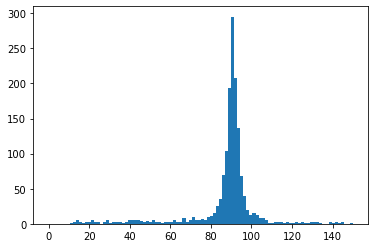

In [55]:
# Compute the mass and plot.
# 
# ("flatten" because Matplotlib needs a flat array, not a jagged array.)

matplotlib.pyplot.hist((first + second).mass.flatten(), bins=100, range=(0, 150));

In [56]:
# Five-minute exercise: plot masses with (1) opposite charges and
#                                        (2) both muon abs(eta) < 1
# This time, it's jagged.

array.muonq, array.muonp4.eta

# first, second = array.muonp4.choose(2).unzip()
# matplotlib.pyplot.hist((first + second).mass.flatten(), bins=100, range=(0, 150));

(<JaggedArray [[1 -1] [1] [1 -1] ... [-1] [-1] [-1]] at 0x79e5facd53c8>,
 <JaggedArray [[-0.15009261562098436 -0.29527552510823807] [0.7538136927232744] [0.20692921428668967 1.0412952985056445] ... [-1.235046871298247] [1.665331082845152] [1.0626988631804193]] at 0x79e5faae4978>)

In [57]:
# Advanced combinatorics: muons that are close to jets

# Step 1: jet-muon pairs with a doubly-jagged structure
# so we have one of these for every jet
jets, muons = array.jetp4.cross(array.muonp4, nested=True).unzip()
jets, muons

(<JaggedArrayMethods [[] [[TLorentzVector(-38.875, 19.863, -0.89494, 44.137)]] [] ... [[TLorentzVector(-3.7148, -37.202, 41.012, 55.951)]] [[TLorentzVector(-36.361, 10.174, 226.43, 229.58)] [TLorentzVector(-15.257, -27.175, 12.12, 33.92)]] []] at 0x79e5faacfa20>,
 <JaggedArrayMethods [[] [[TLorentzVector(-0.81646, -24.404, 20.2, 31.69)]] [] ... [[TLorentzVector(-29.757, -15.304, -52.664, 62.395)]] [[TLorentzVector(1.1419, 63.61, 162.18, 174.21)] [TLorentzVector(1.1419, 63.61, 162.18, 174.21)]] []] at 0x79e5faa6cf60>)

In [58]:
# Advanced combinatorics: muons that are close to jets

# Step 2: ΔR between each jet and muon
distance = jets.delta_r(muons)
distance

<JaggedArray [[] [[2.15373580597128]] [] ... [[2.3998964383388732]] [[1.5536564279683436] [2.943571026533317]] []] at 0x79e5faa746d8>

In [59]:
# Advanced combinatorics: muons that are close to jets

# Step 3: mask those that have any within ΔR < 1.0
mask = (distance < 1.0).any()
print(f"mask:  {mask}")

# Step 4: index of the closest one
index = distance.argmin()
print(f"index: {index}")

mask:  [[] [False] [] ... [False] [False False] []]
index: [[] [[0]] [] ... [[0]] [[0] [0]] []]


In [60]:
# Advanced combinatorics: muons that are close to jets

# Step 5: select those jets
jets_near_muons = jets[index][mask]
jets_near_muons

# (Use this to see just the events that have one.)
# jets_near_muons[jets_near_muons.counts > 0]

<JaggedArrayMethods [[] [] [] ... [] [] []] at 0x79e5faacf128>

In [61]:
# Advanced combinatorics: muons that are close to jets

# Choice A: we want just those jets. Need to flatten the inner arrays so that
# the result is singly jagged, like the original jets.

array["jets_near_muons"] = jets_near_muons.flatten(axis=1)

for i, event in enumerate(array):
    if mask[i].any():
        print(event.jetp4)
        print(event.jets_near_muons)
        print()
    if i > 100:
        break

[TLorentzVector(-71.695, 93.572, 196.3, 230.35) TLorentzVector(36.606, 21.839, 91.666, 101.36) TLorentzVector(-28.866, 9.3207, 51.243, 60.084)]
[TLorentzVector(36.606, 21.839, 91.666, 101.36)]

[TLorentzVector(27.92, -32.921, 231, 235.11)]
[TLorentzVector(27.92, -32.921, 231, 235.11)]

[TLorentzVector(-54.198, 23.507, 160.17, 171.15) TLorentzVector(3.6567, -50.272, 142.22, 151.16)]
[TLorentzVector(3.6567, -50.272, 142.22, 151.16)]

[TLorentzVector(31.497, -17.628, -62.282, 72.257)]
[TLorentzVector(31.497, -17.628, -62.282, 72.257)]

[TLorentzVector(21.356, 62.524, -5.7835, 67.663) TLorentzVector(-27.65, 44.137, -0.13917, 52.654)]
[TLorentzVector(-27.65, 44.137, -0.13917, 52.654)]

[TLorentzVector(-40.948, -31.722, -80.552, 96.232) TLorentzVector(-16.573, -29.426, 150.39, 154.29)]
[TLorentzVector(-40.948, -31.722, -80.552, 96.232)]

[TLorentzVector(27.171, 80.23, -510.04, 517.28) TLorentzVector(11.629, -75.596, -41.266, 87.971)]
[TLorentzVector(11.629, -75.596, -41.266, 87.971)]

[TLore

In [62]:
# Advanced combinatorics: muons that are close to jets

# Choice B: we want to link to the relevant muons, with the ΔR distance

array["nearest_muon"] = muons[index].pad(1, axis=1).flatten(axis=1)
array["distance"]     = distance[index].pad(1, axis=1).flatten(axis=1)

# Set link to None if nearest_muon or distance doesn't pass the cut
array.nearest_muon.content.mask |= ~mask.flatten()
array.distance.content.mask     |= ~mask.flatten()

for i, event in enumerate(array):
    if mask[i].any():
        print(event.jetp4)
        print(event.nearest_muon)
        print(event.distance)
        print()
    if i > 100:
        break

[TLorentzVector(-71.695, 93.572, 196.3, 230.35) TLorentzVector(36.606, 21.839, 91.666, 101.36) TLorentzVector(-28.866, 9.3207, 51.243, 60.084)]
[None TLorentzVector(76.692, -13.956, 335.09, 344.04) None]
[None 0.9723260392266933 None]

[TLorentzVector(27.92, -32.921, 231, 235.11)]
[TLorentzVector(34.884, -15.983, 155.53, 160.19)]
[0.5151781676187408]

[TLorentzVector(-54.198, 23.507, 160.17, 171.15) TLorentzVector(3.6567, -50.272, 142.22, 151.16)]
[None TLorentzVector(34.684, -30.967, 193.68, 199.18)]
[None 0.8552674867146833]

[TLorentzVector(31.497, -17.628, -62.282, 72.257)]
[TLorentzVector(22.55, -3.6572, -86.198, 89.174)]
[0.8043891928764596]

[TLorentzVector(21.356, 62.524, -5.7835, 67.663) TLorentzVector(-27.65, 44.137, -0.13917, 52.654)]
[None TLorentzVector(-33.282, 6.8754, 14.864, 37.093)]
[None 0.9134786608897545]

[TLorentzVector(-40.948, -31.722, -80.552, 96.232) TLorentzVector(-16.573, -29.426, 150.39, 154.29)]
[TLorentzVector(-61.252, -13.58, -104.55, 121.93) None]
[0.44

In [63]:
# Apologies for using functions that have not yet been introduced: just as with
# Numpy, working with awkward arrays means learning a vocabulary of single-step
# functions and putting them together.

a = awkward.fromiter([[1.1, 2.2, 3.3], [], [4.4, 5.5], [6.6, 7.7, 8.8, 9.9]])

# "pad" means fill inner arrays with None until it has at least N elements.
a.pad(3)

<JaggedArray [[1.1 2.2 3.3] [None None None] [4.4 5.5 None] [6.6 7.7 8.8 9.9]] at 0x79e5faa743c8>

In [64]:
# Apologies for using functions that have not yet been introduced: just as with
# Numpy, working with awkward arrays means learning a vocabulary of single-step
# functions and putting them together.

a = awkward.fromiter([[1.1, 2.2, 3.3], [], [4.4, 5.5], [6.6, 7.7, 8.8, 9.9]])

# You can use it with "fillna" and "regular" to make a regular Numpy array.
a.pad(3, clip=True).fillna(999).regular()

array([[  1.1,   2.2,   3.3],
       [999. , 999. , 999. ],
       [  4.4,   5.5, 999. ],
       [  6.6,   7.7,   8.8]])

In [65]:
# Apologies for using functions that have not yet been introduced: just as with
# Numpy, working with awkward arrays means learning a vocabulary of single-step
# functions and putting them together.

a = awkward.fromiter([[1.1, 2.2, 3.3], [], [4.4, 5.5], [6.6, 7.7, 8.8, 9.9]])

# In the previous example, we used it with argmax, which makes inner arrays of
# length 0 or 1, to ensure that they're always length 1.
a.argmax().pad(1)

<JaggedArray [[2] [None] [1] [3]] at 0x79e5faa5fcc0>

In [66]:
# Apologies for using functions that have not yet been introduced: just as with
# Numpy, working with awkward arrays means learning a vocabulary of single-step
# functions and putting them together.

a = awkward.fromiter([[1.1, 2.2, 3.3], [], [4.4, 5.5], [6.6, 7.7, 8.8, 9.9]])

# Once we've done that, we don't need the inner structure anymore and can flatten
# it to get a non-jagged array.
a.argmax().pad(1).flatten()

<MaskedArray [2 None 1 3] at 0x79e5faa74710>

In [67]:
# Apologies for using functions that have not yet been introduced: just as with
# Numpy, working with awkward arrays means learning a vocabulary of single-step
# functions and putting them together.

a = awkward.fromiter([[[1.1, 2.2, 3.3]], [[], [4.4, 5.5]], [[6.6, 7.7, 8.8, 9.9]]])

# But all of that happened inside a doubly-jagged array, in which we wanted to
# collapse the inner dimension, so we used axis=1. (Same meaning as in Numpy.)
a.argmax().pad(1, axis=1).flatten(axis=1)

<JaggedArray [[2] [None 1] [3]] at 0x79e5faa99908>

<br><br>

<p style="font-size: 1.25em">Although we've only talked about variable-length lists, objects, and <tt>None</tt>, awkward-array types form a complete type system:</p>

<ul>
    <li style="font-size: 1.25em"><b>Primitive types:</b> numbers, booleans, and fixed-size binary blobs via Numpy,
    <li style="font-size: 1.25em"><b>Lists:</b> variable-length lists via <tt>JaggedArray</tt>,
    <li style="font-size: 1.25em"><b>Union (sum) types:</b> heterogeneous lists via <tt>UnionArray</tt>,
    <li style="font-size: 1.25em"><b>Record (product) types:</b> objects (<tt>Table</tt>), implicitly in our previous examples,
    <li style="font-size: 1.25em"><b>Pointers:</b> cross-references and circular references via <tt>IndexedArray</tt>,
    <li style="font-size: 1.25em"><b>Non-contiguous data:</b> via <tt>ChunkedArray</tt>,
    <li style="font-size: 1.25em"><b>Lazy data:</b> via <tt>VirtualArray</tt>.
</ul>

<br><br>

In [68]:
# Just to demonstrate, let's make a tree...

tree = awkward.fromiter([
    {"value": 1.23, "left":    1, "right":    2},     # node 0
    {"value": 3.21, "left":    3, "right":    4},     # node 1
    {"value": 9.99, "left":    5, "right":    6},     # node 2
    {"value": 3.14, "left":    7, "right": None},     # node 3
    {"value": 2.71, "left": None, "right":    8},     # node 4
    {"value": 5.55, "left": None, "right": None},     # node 5
    {"value": 8.00, "left": None, "right": None},     # node 6
    {"value": 9.00, "left": None, "right": None},     # node 7
    {"value": 0.00, "left": None, "right": None},     # node 8
])

left = tree.contents["left"].content
right = tree.contents["right"].content
left[(left < 0) | (left > 8)] = 0
right[(right < 0) | (right > 8)] = 0

tree.contents["left"].content = awkward.IndexedArray(left, tree)
tree.contents["right"].content = awkward.IndexedArray(right, tree)

In [69]:
print("Physical layout:")
print("------------------------------------------------------------------")
for i, x in tree.layout.items():
    if x.cls == numpy.ndarray:
        print("{0:10s} {1}".format(repr(i), x.array))

import json
print("\nLogical meaning:")
print("------------------------------------------------------------------")
print(json.dumps(tree[0].tolist(), indent=4))

Physical layout:
------------------------------------------------------------------
(0, 0)     [False False False False  True  True  True  True  True]
(0, 1, 0)  [1 3 5 7 1 0 1 2 3]
(1, 0)     [False False False  True False  True  True  True  True]
(1, 1, 0)  [2 4 6 0 8 0 0 0 1]
(2,)       [1.23 3.21 9.99 3.14 2.71 5.55 8.   9.   0.  ]

Logical meaning:
------------------------------------------------------------------
{
    "left": {
        "left": {
            "left": {
                "left": null,
                "right": null,
                "value": 9.0
            },
            "right": null,
            "value": 3.14
        },
        "right": {
            "left": null,
            "right": {
                "left": null,
                "right": null,
                "value": 0.0
            },
            "value": 2.71
        },
        "value": 3.21
    },
    "right": {
        "left": {
            "left": null,
            "right": null,
            "value": 5.55
 

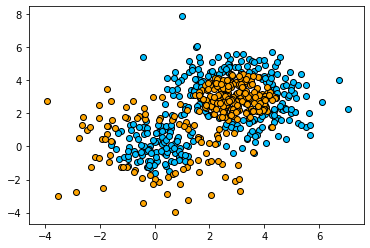

In [70]:
# For those of you who were here yesterday, do you remember this?
import sklearn.datasets, matplotlib.pyplot
X1, y1 = sklearn.datasets.make_gaussian_quantiles(
    cov=2.0, n_samples=200, n_features=2, n_classes=2, random_state=1)
X2, y2 = sklearn.datasets.make_gaussian_quantiles(
    mean=(3, 3), cov=1.5, n_samples=400, n_features=2, n_classes=2, random_state=1)
X = numpy.concatenate((X1, X2))
y = numpy.concatenate((y1, -y2 + 1))
matplotlib.pyplot.scatter(X[y == 0, 0], X[y == 0, 1], c="deepskyblue", edgecolor="black");
matplotlib.pyplot.scatter(X[y == 1, 0], X[y == 1, 1], c="orange", edgecolor="black");

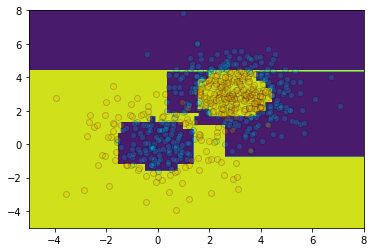

In [71]:
# We made a decision tree using Scikit-Learn...
import sklearn.tree
decision_tree = sklearn.tree.DecisionTreeClassifier(max_depth=8)
decision_tree.fit(X, y)
xx, yy = numpy.meshgrid(numpy.arange(-5, 8, 0.02), numpy.arange(-5, 8, 0.02))
Z = decision_tree.predict(numpy.c_[xx.ravel(), yy.ravel()]).reshape(xx.shape)
matplotlib.pyplot.contourf(xx, yy, Z);
matplotlib.pyplot.scatter(X[y == 0, 0], X[y == 0, 1], c="deepskyblue", edgecolor="black", alpha=0.2);
matplotlib.pyplot.scatter(X[y == 1, 0], X[y == 1, 1], c="orange", edgecolor="black", alpha=0.2);
matplotlib.pyplot.xlim(-5, 8); matplotlib.pyplot.ylim(-5, 8);

In [72]:
# Scikit-Learn is already using columnar trees: we can just cast it.
mask = decision_tree.tree_.children_left < 0
left = decision_tree.tree_.children_left.copy()
right = decision_tree.tree_.children_right.copy()
left[mask] = 0
right[mask] = 0

tree = awkward.Table()
tree["feature"]   = awkward.MaskedArray(mask, decision_tree.tree_.feature)
tree["threshold"] = awkward.MaskedArray(mask, decision_tree.tree_.threshold)
tree["left"]      = awkward.MaskedArray(mask, awkward.IndexedArray(left, tree))
tree["right"]     = awkward.MaskedArray(mask, awkward.IndexedArray(right, tree))
tree["value"]     = decision_tree.tree_.value[:, 0, 0] - decision_tree.tree_.value[:, 0, 1]

tree[0].tolist()

{'feature': 1,
 'threshold': 4.358384370803833,
 'left': {'feature': 1,
  'threshold': 1.6863000392913818,
  'left': {'feature': 1,
   'threshold': -1.205420196056366,
   'left': {'feature': 1,
    'threshold': -1.6025586128234863,
    'left': {'feature': None,
     'threshold': None,
     'left': None,
     'right': None,
     'value': -21.0},
    'right': {'feature': 0,
     'threshold': -0.5012892186641693,
     'left': {'feature': None,
      'threshold': None,
      'left': None,
      'right': None,
      'value': -6.0},
     'right': {'feature': 0,
      'threshold': 0.7826883494853973,
      'left': {'feature': None,
       'threshold': None,
       'left': None,
       'right': None,
       'value': 5.0},
      'right': {'feature': None,
       'threshold': None,
       'left': None,
       'right': None,
       'value': -3.0},
      'value': 2.0},
     'value': -4.0},
    'value': -25.0},
   'right': {'feature': 0,
    'threshold': -1.5795212388038635,
    'left': {'feature':

<br>

<p style="font-size: 1.25em">Columnar data structures are more general than the array-at-a-time programming paradigm. There are ongoing efforts to use the same awkward arrays in several programming paradigms:</p>

<ul>
    <li style="font-size: 1.25em"><b>conventional imperative programming</b> in Numba (compiled Python, using awkward arrays as data types),
    <li style="font-size: 1.25em"><b>truly vectorized programming</b> on GPUs with CuPy and Numba,
    <li style="font-size: 1.25em"><b>declarative languages</b> (user specifies the <i>what</i>, not the <i>how</i>). Examples: LINQ, SQL-per-event, combinatorical pattern-matching...
</ul>

<br>

<p style="font-size: 1.25em">Columnar data structures provide a zero-copy medium between all of these paradigms.</p>

<br>

<br><br><br><br>

<center><img src="img/uproot-logo.png" width="40%"></center>

<br><br><br><br>

In [73]:
# We've been using uproot for many of our examples so far.
# 
# As a re-write of ROOT I/O in Python, uproot presents the data in a Pythonic way:

file = uproot.open("http://scikit-hep.org/uproot/examples/nesteddirs.root")

print("file is a read-only dict, from object names to objects:\n")
print(f"file.keys()                  → {file.keys()}\n")
print(f"file['one'].keys()           → {file['one'].keys()}\n")
print(f"file['one']['two'].classes() → {dict(file['one']['two'].classes())}\n")
print(f"file['one']['two']['tree']   → {file['one']['two']['tree']}\n")
print(f"file['one/two/tree']         → {file['one/two/tree']}")

file is a read-only dict, from object names to objects:

file.keys()                  → [b'one;1', b'three;1']

file['one'].keys()           → [b'two;1', b'tree;1']

file['one']['two'].classes() → {b'tree;1': <class 'uproot.rootio.TTree'>}

file['one']['two']['tree']   → <TTree b'tree' at 0x79e5f7a90748>

file['one/two/tree']         → <TTree b'tree' at 0x79e5f70ceef0>


In [74]:
# TBranches of TTrees are also presented as dicts.
events = uproot.open("data/Zmumu.root")["events"]
events.keys()

[b'Type',
 b'Run',
 b'Event',
 b'E1',
 b'px1',
 b'py1',
 b'pz1',
 b'pt1',
 b'eta1',
 b'phi1',
 b'Q1',
 b'E2',
 b'px2',
 b'py2',
 b'pz2',
 b'pt2',
 b'eta2',
 b'phi2',
 b'Q2',
 b'M']

In [75]:
# Get an array with TBranch.array().

events["E1"].array()

array([82.20186639, 62.34492895, 62.34492895, ..., 81.27013558,
       81.27013558, 81.56621735])

In [76]:
# Or TTree.array(branchname).

events.array("E1")

array([82.20186639, 62.34492895, 62.34492895, ..., 81.27013558,
       81.27013558, 81.56621735])

In [77]:
# The plural form, arrays, returns a dict from branch names to arrays.

events.arrays("E1")

{b'E1': array([82.20186639, 62.34492895, 62.34492895, ..., 81.27013558,
        81.27013558, 81.56621735])}

In [78]:
# You get the arrays you ask for.

events.arrays(["E1", "px1", "py1", "pz1"])

{b'E1': array([82.20186639, 62.34492895, 62.34492895, ..., 81.27013558,
        81.27013558, 81.56621735]),
 b'px1': array([-41.19528764,  35.11804977,  35.11804977, ...,  32.37749196,
         32.37749196,  32.48539387]),
 b'py1': array([ 17.4332439 , -16.57036233, -16.57036233, ...,   1.19940578,
          1.19940578,   1.2013503 ]),
 b'pz1': array([-68.96496181, -48.77524654, -48.77524654, ..., -74.53243061,
        -74.53243061, -74.80837247])}

In [79]:
# With wildcards.

events.arrays(["E1", "p[xyz]1"])

{b'E1': array([82.20186639, 62.34492895, 62.34492895, ..., 81.27013558,
        81.27013558, 81.56621735]),
 b'px1': array([-41.19528764,  35.11804977,  35.11804977, ...,  32.37749196,
         32.37749196,  32.48539387]),
 b'py1': array([ 17.4332439 , -16.57036233, -16.57036233, ...,   1.19940578,
          1.19940578,   1.2013503 ]),
 b'pz1': array([-68.96496181, -48.77524654, -48.77524654, ..., -74.53243061,
        -74.53243061, -74.80837247])}

In [80]:
# These are the same wildcard patterns as matching files in UNIX.

events.arrays(["E1", "p*1"])

{b'E1': array([82.20186639, 62.34492895, 62.34492895, ..., 81.27013558,
        81.27013558, 81.56621735]),
 b'px1': array([-41.19528764,  35.11804977,  35.11804977, ...,  32.37749196,
         32.37749196,  32.48539387]),
 b'py1': array([ 17.4332439 , -16.57036233, -16.57036233, ...,   1.19940578,
          1.19940578,   1.2013503 ]),
 b'pz1': array([-68.96496181, -48.77524654, -48.77524654, ..., -74.53243061,
        -74.53243061, -74.80837247]),
 b'pt1': array([44.7322, 38.8311, 38.8311, ..., 32.3997, 32.3997, 32.3997]),
 b'phi1': array([ 2.74126  , -0.440873 , -0.440873 , ...,  0.0370275,  0.0370275,
         0.0370275])}

In [81]:
# Or with slashes, they become regular expressions.

events.arrays(["E1", "/p.*[0-1]/"])

{b'E1': array([82.20186639, 62.34492895, 62.34492895, ..., 81.27013558,
        81.27013558, 81.56621735]),
 b'px1': array([-41.19528764,  35.11804977,  35.11804977, ...,  32.37749196,
         32.37749196,  32.48539387]),
 b'py1': array([ 17.4332439 , -16.57036233, -16.57036233, ...,   1.19940578,
          1.19940578,   1.2013503 ]),
 b'pz1': array([-68.96496181, -48.77524654, -48.77524654, ..., -74.53243061,
        -74.53243061, -74.80837247]),
 b'pt1': array([44.7322, 38.8311, 38.8311, ..., 32.3997, 32.3997, 32.3997]),
 b'phi1': array([ 2.74126  , -0.440873 , -0.440873 , ...,  0.0370275,  0.0370275,
         0.0370275])}

In [82]:
# The "b" before each string (for bytestring) can be removed in Python 3 by
# specifying an encoding (strings in ROOT have no default encoding).

events.arrays(["E1", "px1", "py1", "pz1"], namedecode="utf-8")

{'E1': array([82.20186639, 62.34492895, 62.34492895, ..., 81.27013558,
        81.27013558, 81.56621735]),
 'px1': array([-41.19528764,  35.11804977,  35.11804977, ...,  32.37749196,
         32.37749196,  32.48539387]),
 'py1': array([ 17.4332439 , -16.57036233, -16.57036233, ...,   1.19940578,
          1.19940578,   1.2013503 ]),
 'pz1': array([-68.96496181, -48.77524654, -48.77524654, ..., -74.53243061,
        -74.53243061, -74.80837247])}

In [83]:
# And we can change the container from a dict to something else by passing a
# class name; tuple is useful because it lets us assign each array.

E, px, py, pz = events.arrays(["E1", "px1", "py1", "pz1"], outputtype=tuple)

In [84]:
# outputtype=pandas.DataFrame is a synonym for TTree.pandas.df.

import pandas
events.arrays(["E1", "px1", "py1", "pz1"], outputtype=pandas.DataFrame)

,E1,px1,py1,pz1
entry,,,,
0,82.201866,-41.195288,17.433244,-68.964962
1,62.344929,35.118050,-16.570362,-48.775247
2,62.344929,35.118050,-16.570362,-48.775247
3,60.621875,34.144437,-16.119525,-47.426984
4,41.826389,22.783582,15.036444,-31.689894
5,48.981407,-19.862307,-9.204225,43.817098
6,48.981407,-19.862307,-9.204225,43.817098
7,49.760726,-20.177373,-9.354149,44.513955
8,132.780755,71.143711,29.542308,-108.150553


In [85]:
# Use an explicit cache to avoid reading many times from the same file.

uproot.asdtype.debug_reading = True

print("asking for array...")
events.array("E1")

mycache = {}    # or maybe uproot.ArrayCache("1 GB")

print("asking for it with a cache...")
events.array("E1", cache=mycache)

print("asking for it again...")
events.array("E1", cache=mycache)

uproot.asdtype.debug_reading = False

asking for array...
reading array([82.20186639, 62.34492895, 62.34492895, ..., 81.27013558,
       81.27013558, 81.56621735])
asking for it with a cache...
reading array([82.20186639, 62.34492895, 62.34492895, ..., 81.27013558,
       81.27013558, 81.56621735])
asking for it again...


<br>

<p style="font-weight: bold; font-size: 1.875em; color: gray">Three ways to get data:</p>

<table width="100%" style="font-size: 1.25em"><tr style="background: white;">
    <td width="33%" style="vertical-align: top">
        <p style="font-weight: bold; font-size: 1.5em; margin-bottom: 0.5em">Direct</p>
        <p>Read the file and return an array.</p>
        <ul>
            <li style="margin-bottom: 0.3em"><a href="https://uproot.readthedocs.io/en/latest/ttree-handling.html#id11">TBranch.array</a></li>
            <li style="margin-bottom: 0.3em"><a href="https://uproot.readthedocs.io/en/latest/ttree-handling.html#array">TTree.array</a></li>
            <li style="margin-bottom: 0.3em"><a href="https://uproot.readthedocs.io/en/latest/ttree-handling.html#arrays">TTree.arrays</a></li>
        </ul>
    </td><td width="33%" style="vertical-align: top">
        <p style="font-weight: bold; font-size: 1.5em; margin-bottom: 0.5em">Lazy</p>
        <p>Get an object that reads on demand.</p>
        <ul>
            <li style="margin-bottom: 0.3em"><a href="https://uproot.readthedocs.io/en/latest/ttree-handling.html#id13">TBranch.lazyarray</a></li>
            <li style="margin-bottom: 0.3em"><a href="https://uproot.readthedocs.io/en/latest/ttree-handling.html#lazyarray">TTree.lazyarray</a></li>
            <li style="margin-bottom: 0.3em"><a href="https://uproot.readthedocs.io/en/latest/ttree-handling.html#lazyarrays">TTree.lazyarrays</a></li>
            <li style="margin-bottom: 0.3em"><a href="https://uproot.readthedocs.io/en/latest/opening-files.html#uproot-lazyarray-and-lazyarrays">uproot.lazyarray</a>*</li>
            <li style="margin-bottom: 0.3em"><a href="https://uproot.readthedocs.io/en/latest/opening-files.html#uproot-lazyarray-and-lazyarrays">uproot.lazyarrays</a>*</li>
        </ul>
    </td><td width="33%" style="vertical-align: top">
        <p style="font-weight: bold; font-size: 1.5em; margin-bottom: 0.5em">Iterative</p>
        <p>Read arrays in batches of entries.</p>
        <ul>
            <li style="margin-bottom: 0.3em"><a href="https://uproot.readthedocs.io/en/latest/ttree-handling.html#iterate">TTree.iterate</a></li>
            <li style="margin-bottom: 0.3em"><a href="https://uproot.readthedocs.io/en/latest/opening-files.html#uproot-iterate">uproot.iterate</a>*</li>
        </ul>
    </td>
</tr></table>

<p>*Lazy arrays or iteration over sets of files.</p>

In [86]:
# Direct:

events.array("E1")

array([82.20186639, 62.34492895, 62.34492895, ..., 81.27013558,
       81.27013558, 81.56621735])

In [87]:
# Lazy:

uproot.asdtype.debug_reading = True

print("getting lazy array...")
lazyarray = events.lazyarray("E1", entrysteps=500)
print(f"len(lazyarray.chunks) = {len(lazyarray.chunks)}")

print("before looking at the array...")
print(f"lazyarray = {lazyarray}")
print(f"chunks read = {[x.ismaterialized for x in lazyarray.chunks]}")

print("before computing a value...")
print(f"numpy.sqrt(lazyarray) = {numpy.sqrt(lazyarray)}")

print("before computing another value...")
print(f"lazyarray**2 = {numpy.sqrt(lazyarray)}")

uproot.asdtype.debug_reading = False

getting lazy array...
len(lazyarray.chunks) = 5
before looking at the array...
reading array([ 82.20186639,  62.34492895,  62.34492895,  60.62187459,
        41.82638891,  48.98140695,  48.98140695,  49.76072566,
       132.78075492,  88.07833019,  88.07833019,  87.79565929,
        48.61914427,  46.40435116,  46.40435116,  46.51991282,
        57.36815016,  80.8941568 ,  80.8941568 ,  81.31144951,
        79.48779395,  50.50759651,  50.50759651,  50.59211055,
        41.47090944,  55.39297755,  55.39297755,  55.54290677,
       112.8839809 ,  31.41995067,  31.41995067,  31.42339926,
        73.34548002,  33.0810183 ,  33.0810183 ,  32.45151863,
        36.76969687,  78.54927722,  78.54927722,  76.95658284,
        71.38162765,  37.11945042,  37.11945042,  37.10875051,
        41.34095485,  41.21802884,  41.21802884,  14.25833323,
        14.25833323,  14.25833323,  14.25833323,  41.2330742 ,
       105.725502  ,  68.35271716,  68.35271716,  68.45669076,
       196.16113519,  29.909979

In [88]:
# Iterative:

for arrays in events.iterate("E1", entrysteps=500):
    print(arrays)

{b'E1': array([ 82.20186639,  62.34492895,  62.34492895,  60.62187459,
        41.82638891,  48.98140695,  48.98140695,  49.76072566,
       132.78075492,  88.07833019,  88.07833019,  87.79565929,
        48.61914427,  46.40435116,  46.40435116,  46.51991282,
        57.36815016,  80.8941568 ,  80.8941568 ,  81.31144951,
        79.48779395,  50.50759651,  50.50759651,  50.59211055,
        41.47090944,  55.39297755,  55.39297755,  55.54290677,
       112.8839809 ,  31.41995067,  31.41995067,  31.42339926,
        73.34548002,  33.0810183 ,  33.0810183 ,  32.45151863,
        36.76969687,  78.54927722,  78.54927722,  76.95658284,
        71.38162765,  37.11945042,  37.11945042,  37.10875051,
        41.34095485,  41.21802884,  41.21802884,  14.25833323,
        14.25833323,  14.25833323,  14.25833323,  41.2330742 ,
       105.725502  ,  68.35271716,  68.35271716,  68.45669076,
       196.16113519,  29.90997935,  29.90997935,   8.67840117,
         8.67840117,   8.67840117,   8.67840117

<br><br>

<p style="font-weight: bold; font-size: 1.875em; color: gray">Advantages and disadvantages of each:</p>

<table width="100%" style="font-size: 1.25em"><tr style="background: white;">
    <td width="33%" style="vertical-align: top">
        <p style="font-weight: bold; font-size: 1.5em; margin-bottom: 0.5em">Direct</p>
        <p>Simple; returns pure Numpy arrays if possible.</p>
    </td><td width="33%" style="vertical-align: top">
        <p style="font-weight: bold; font-size: 1.5em; margin-bottom: 0.5em">Lazy</p>
        <p>Transparently work on data too large to fit into memory.</p>
    </td><td width="33%" style="vertical-align: top">
        <p style="font-weight: bold; font-size: 1.5em; margin-bottom: 0.5em">Iterative</p>
        <p>Control the loading of data into and out of memory.</p>
    </td>
</tr></table>

In [89]:
# Controlling the chunk size:

print("Lazy or iteration steps as a fixed number of entries:")
for arrays in events.iterate(entrysteps=500):
    print(len(arrays[b"E1"]))

print("\nLazy or iteration steps as a fixed memory footprint:")
for arrays in events.iterate(entrysteps="100 kB"):
    print(len(arrays[b"E1"]))

Lazy or iteration steps as a fixed number of entries:
500
500
500
500
304

Lazy or iteration steps as a fixed memory footprint:
717
717
717
153


In [90]:
# Reading complex data: mostly simplified by the fact that C++ classes are "split"
# into TBranches, and most TBranches are simple arrays.

tree = uproot.open("http://scikit-hep.org/uproot/examples/Event.root")["T"]
tree.show()

# branch name              streamer type, if any      uproot's interpretation

event                      TStreamerInfo              None
TObject                    TStreamerInfo              None
fUniqueID                  TStreamerBasicType         asdtype('>u4')
fBits                      TStreamerBasicType         asdtype('>u4')

fType[20]                  TStreamerBasicType         asdtype("('i1', (20,))")
fEventName                 TStreamerBasicType         asstring(4)
fNtrack                    TStreamerBasicType         asdtype('>i4')
fNseg                      TStreamerBasicType         asdtype('>i4')
fNvertex                   TStreamerBasicType         asdtype('>u4')
fFlag                      TStreamerBasicType         asdtype('>u4')
fTemperature               TStreamerBasicType         asdtype('>f4', 'float64')
fMeasures[10]              TStreamerBasicType         asdtype("('>i4', (10,))")
fMatrix[4][4]              TStreamerBasicType         asdtype("('>f4', (4, 4))", "('<f8', (4, 4))")
fClosestDistance           TStreamerBasicPointer      None
fEv

In [91]:
# In this view, class attributes are NOT special types; they're just numbers.

tree.array("fTemperature", entrystop=20)

array([20.28261757, 20.47114182, 20.5931778 , 20.5848484 , 20.80287933,
       20.2972393 , 20.30301666, 20.87490845, 20.56552505, 20.67128181,
       20.74524879, 20.85200119, 20.26188469, 20.82903862, 20.02412415,
       20.97918129, 20.71551132, 20.60189629, 20.11310196, 20.53161049])

In [92]:
# Fixed-width matrices are multidimensional arrays,

tree.array("fMatrix[4][4]", entrystop=6)

array([[[ 1.54053164,  0.09474282,  1.52469206,  0.        ],
        [-0.13630907,  0.80078429,  1.70623565,  0.        ],
        [-1.16029346,  2.012362  ,  4.02206421,  0.        ],
        [ 0.        ,  0.        ,  0.        ,  0.        ]],

       [[ 0.41865557,  1.60363352, -0.56923842,  0.        ],
        [ 0.06950195,  0.79105824,  2.0322361 ,  0.        ],
        [ 0.05688119,  2.52811217,  3.91394544,  0.        ],
        [ 0.        ,  0.        ,  0.        ,  0.        ]],

       [[-1.24031985,  2.3477006 , -0.67482847,  0.        ],
        [ 1.22933233,  1.39499295,  2.17524433,  0.        ],
        [ 0.18559125,  2.40421987,  4.56326485,  0.        ],
        [ 0.        ,  0.        ,  0.        ,  0.        ]],

       [[-0.43785933, -0.05061727,  0.28988785,  0.        ],
        [-0.90204114,  0.88527524,  2.34751844,  0.        ],
        [ 0.3241719 ,  0.79971647,  4.13229847,  0.        ],
        [ 0.        ,  0.        ,  0.        ,  0.        ]],



In [93]:
# branches with multiple leaves ("leaf-list") are Numpy record arrays,

uproot.open("http://scikit-hep.org/uproot/examples/"
                                    "leaflist.root")["tree"]["leaflist"].array()

array([(1.1, 1,  97), (2.2, 2,  98), (3.3, 3,  99), (4. , 4, 100),
       (5.5, 5, 101)], dtype=[('x', '<f8'), ('y', '<i4'), ('z', 'i1')])

In [94]:
# and anything in variable-length lists is a JaggedArray,

tree.array("fTracks.fMass2", entrystop=6)

<JaggedArray [[4.5 4.5 4.5 ... 4.5 4.5 4.5] [4.5 4.5 4.5 ... 4.5 4.5 4.5] [8.90625 8.90625 8.90625 ... 8.90625 8.90625 8.90625] [8.90625 8.90625 8.90625 ... 8.90625 8.90625 8.90625] [8.90625 8.90625 8.90625 ... 8.90625 8.90625 8.90625] [4.5 4.5 4.5 ... 4.5 4.5 4.5]] at 0x79e5f6fad908>

In [95]:
# even if it's fixed-width within jagged or whatever.

tree.array("fTracks.fTArray[3]", entrystop=6)

<JaggedArray [[[8.783523 17.513435 29.286354] [12.712547 18.882881 32.797363] [11.507339 19.916798 30.246092] ... [10.574707 18.890305 33.728233] [12.15555 18.71774 27.312075] [9.859776 19.74885 29.493528]] [[11.219862 21.20887 30.624903] [11.040182 24.79719 31.77871] [10.012672 20.93199 30.9403] ... [11.168169 23.217058 32.748943] [9.50235 21.121288 31.071629] [10.8550205 16.183943 26.904243]] [[8.624067 18.600851 26.04787] [10.689135 20.227545 29.83834] [11.296425 21.689695 27.481518] ... [10.669026 17.53861 27.396368] [10.695017 21.800402 29.768854] [9.190737 19.556316 30.239576]] [[10.730627 21.374237 29.189438] [10.917027 17.502947 24.684587] [10.719291 15.140461 30.947819] ... [11.342936 21.652617 30.104565] [10.155848 19.01908 31.161093] [9.246191 18.550188 29.727875]] [[11.012184 18.038168 25.433424] [9.5870495 19.802078 30.07635] [10.900804 19.059767 28.11974] ... [10.958439 19.644995 24.516222] [9.493415 19.871706 30.69776] [9.26706 21.658216 36.870094]] [[10.6818 23.174397 3

In [96]:
# There are some types that ROOT does not split because they are too complex.
# For example, *histograms* inside a TTree:

tree.array("fH", entrystop=6)

<ObjectArray [<b'TH1F' b'hstat' 0x79e5f6fc4548> <b'TH1F' b'hstat' 0x79e5f7025f98> <b'TH1F' b'hstat' 0x79e5f6fc47c8> <b'TH1F' b'hstat' 0x79e5f6fc4548> <b'TH1F' b'hstat' 0x79e5f7025f98> <b'TH1F' b'hstat' 0x79e5f6fc47c8>] at 0x79e5f70193c8>

In [97]:
# Uproot can read objects like this because ROOT describes their layout in
# "streamers;" uproot reads the (most common types of) streamers and generates
# Python classes, some of which have specialized, high-level methods.

for histogram in tree.array("fH", entrystop=3):
    print(histogram.title)
    print(histogram.values)
print("\n...\n")
for histogram in tree.array("fH", entrystart=-3):
    print(histogram.title)
    print(histogram.values)

b'Event Histogram'
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0.]
b'Event Histogram'
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0.]
b'Event Histogram'
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0.]

...

b'Event Histogram'


In [98]:
# As we've seen, histograms have some convenience methods.
# They're mostly for conversion to other formats, like Numpy.
# 
# Numpy "histograms" are a 2-tuple of counts and edges.

uproot.open("http://scikit-hep.org/uproot/examples/"
                                        "hepdata-example.root")["hpx"].numpy()

(array([2.000e+00, 3.000e+00, 1.000e+00, 1.000e+00, 2.000e+00, 4.000e+00,
        6.000e+00, 1.200e+01, 8.000e+00, 9.000e+00, 1.500e+01, 1.500e+01,
        3.100e+01, 3.500e+01, 4.000e+01, 6.400e+01, 6.400e+01, 8.100e+01,
        1.080e+02, 1.240e+02, 1.560e+02, 1.650e+02, 2.090e+02, 2.620e+02,
        2.970e+02, 3.920e+02, 4.320e+02, 4.660e+02, 5.210e+02, 6.040e+02,
        6.570e+02, 7.880e+02, 9.030e+02, 1.079e+03, 1.135e+03, 1.160e+03,
        1.383e+03, 1.458e+03, 1.612e+03, 1.770e+03, 1.868e+03, 1.861e+03,
        1.946e+03, 2.114e+03, 2.175e+03, 2.207e+03, 2.273e+03, 2.276e+03,
        2.329e+03, 2.325e+03, 2.381e+03, 2.417e+03, 2.364e+03, 2.284e+03,
        2.188e+03, 2.164e+03, 2.130e+03, 1.940e+03, 1.859e+03, 1.763e+03,
        1.700e+03, 1.611e+03, 1.459e+03, 1.390e+03, 1.237e+03, 1.083e+03,
        1.046e+03, 8.880e+02, 7.520e+02, 7.420e+02, 6.730e+02, 5.550e+02,
        5.330e+02, 3.660e+02, 3.780e+02, 2.720e+02, 2.560e+02, 2.000e+02,
        1.740e+02, 1.320e+02, 1.180e+0

In [99]:
# Similarly for 2-dimensional histograms.

uproot.open("http://scikit-hep.org/uproot/examples/hepdata-example.root")["hpxpy"].numpy()

(array([[0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        ...,
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.]], dtype=float32),
 [(array([-4. , -3.8, -3.6, -3.4, -3.2, -3. , -2.8, -2.6, -2.4, -2.2, -2. ,
          -1.8, -1.6, -1.4, -1.2, -1. , -0.8, -0.6, -0.4, -0.2,  0. ,  0.2,
           0.4,  0.6,  0.8,  1. ,  1.2,  1.4,  1.6,  1.8,  2. ,  2.2,  2.4,
           2.6,  2.8,  3. ,  3.2,  3.4,  3.6,  3.8,  4. ]),
   array([-4. , -3.8, -3.6, -3.4, -3.2, -3. , -2.8, -2.6, -2.4, -2.2, -2. ,
          -1.8, -1.6, -1.4, -1.2, -1. , -0.8, -0.6, -0.4, -0.2,  0. ,  0.2,
           0.4,  0.6,  0.8,  1. ,  1.2,  1.4,  1.6,  1.8,  2. ,  2.2,  2.4,
           2.6,  2.8,  3. ,  3.2,  3.4,  3.6,  3.8,  4. ]))])

In [100]:
# It can also be useful to turn histograms into Pandas DataFrames (note the IntervalIndex).

uproot.open("http://scikit-hep.org/uproot/examples/Event.root")["htime"].pandas()

,count,variance
Real-Time to write versus time,,
"[-inf, 0.0)",0.021839,0.000477
"[0.0, 1.0)",0.333522,0.111237
"[1.0, 2.0)",0.304030,0.092434
"[2.0, 3.0)",0.324519,0.105313
"[3.0, 4.0)",0.350973,0.123182
"[4.0, 5.0)",0.368942,0.136118
"[5.0, 6.0)",0.307283,0.094423
"[6.0, 7.0)",0.306812,0.094134
"[7.0, 8.0)",0.341563,0.116665


In [101]:
# Or HEPData's YAML format. As Python objects, it's just a little work to make different formats.

print(uproot.open("http://scikit-hep.org/uproot/examples/Event.root")["htime"].hepdata())

dependent_variables:
- header:
    name: counts
    units: null
  qualifiers: []
  values:
  - errors:
    - label: stat
      symerror: 0.33352208137512207
    value: 0.33352208137512207
  - errors:
    - label: stat
      symerror: 0.3040299415588379
    value: 0.3040299415588379
  - errors:
    - label: stat
      symerror: 0.32451915740966797
    value: 0.32451915740966797
  - errors:
    - label: stat
      symerror: 0.35097289085388184
    value: 0.35097289085388184
  - errors:
    - label: stat
      symerror: 0.3689420223236084
    value: 0.3689420223236084
  - errors:
    - label: stat
      symerror: 0.3072829246520996
    value: 0.3072829246520996
  - errors:
    - label: stat
      symerror: 0.306812047958374
    value: 0.306812047958374
  - errors:
    - label: stat
      symerror: 0.34156298637390137
    value: 0.34156298637390137
  - errors:
    - label: stat
      symerror: 0.16150808334350586
    value: 0.16150808334350586
  - errors:
    - label: stat
      symerror: 

In [102]:
# At the moment, only two kinds of objects can be *written* to ROOT files:
# TObjString and histograms.
# 
# To write, open a file for writing (create/recreate/update) and assign to it
# like a dict:

file = uproot.recreate("tmp.root", compression=uproot.ZLIB(4))
file["name"] = "Some object, like a TObjString."

In [103]:
import ROOT

pyroot_file = ROOT.TFile("tmp.root")
pyroot_file.Get("name")

'Some object, like a TObjString.'

In [104]:
# During assignment, uproot recognizes Pythonic types, such as Numpy histograms.

file["from_numpy"] = numpy.histogram(numpy.random.normal(0, 1, 10000))

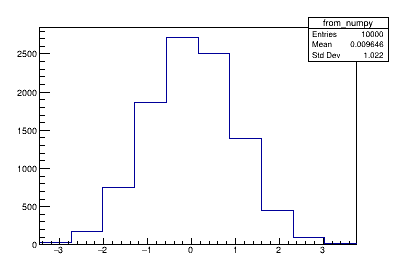

In [105]:
pyroot_file = ROOT.TFile("tmp.root")           # refresh the PyROOT file
pyroot_hist = pyroot_file.Get("from_numpy")

canvas = ROOT.TCanvas("canvas", "", 400, 300)
pyroot_hist.Draw("hist")
canvas.Draw()

In [106]:
# 2-dimensional Numpy histograms.

file["from_numpy2d"] = numpy.histogram2d(numpy.random.normal(0, 1, 10000), numpy.random.normal(0, 1, 10000))

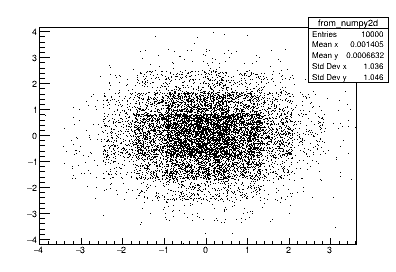

In [107]:
pyroot_file = ROOT.TFile("tmp.root")           # refresh the PyROOT file
pyroot_hist = pyroot_file.Get("from_numpy2d")

pyroot_hist.Draw()
canvas.Draw()